In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#On importe notre fichier nettoyé
data = pd.read_csv('data_conso_emissions.csv', sep = ';')
display(data.head())

,OSEBuildingID,BuildingType,PrimaryPropertyType,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,...,Error Buildings,log_conso,log_emissions,TotalGFA,Age,PropertyType,Sum_energies,Surface/étage,Surface/batiment,Type_energie
0,1,NonResidential,Hotel,405 Olive way,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,...,No Error,6.858920,2.397905,88434.0,89,Hotel,7226362.00,7369.500000,88434.0,1.0
1,2,NonResidential,Hotel,724 Pine street,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,...,No Error,6.923655,2.471086,103566.0,20,Hotel,8387933.00,8045.636364,88502.0,2.0
2,3,NonResidential,Hotel,1900 5th Avenue,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,...,No Error,7.860859,3.319997,756493.0,47,Hotel,72587018.00,18521.756098,759392.0,1.0
3,5,NonResidential,Hotel,620 STEWART ST,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,...,No Error,6.832163,2.457019,61320.0,90,Hotel,6794583.25,6132.000000,61320.0,1.0
4,8,NonResidential,Hotel,401 LENORA ST,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,...,No Error,7.151450,2.703300,191454.0,36,Hotel,14172605.00,6310.000000,113580.0,2.0


# 1) Structure des données

In [3]:
data.shape

(1363, 38)

In [4]:
data.columns

Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'Address',
       'ZipCode', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
       'Neighborhood', 'Latitude', 'Longitude', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)',
       'TotalGHGEmissions', 'GHGEmissionsIntensity', 'CountPropertyUseTypes',
       'Error Buildings', 'log_conso', 'log_emissions', 'TotalGFA', 'Age',
       'PropertyType', 'Sum_energies', 'Surface/étage', 'Surface/batiment',
       'Type_energie'],
      dtype='object')

# 2) Corrélations

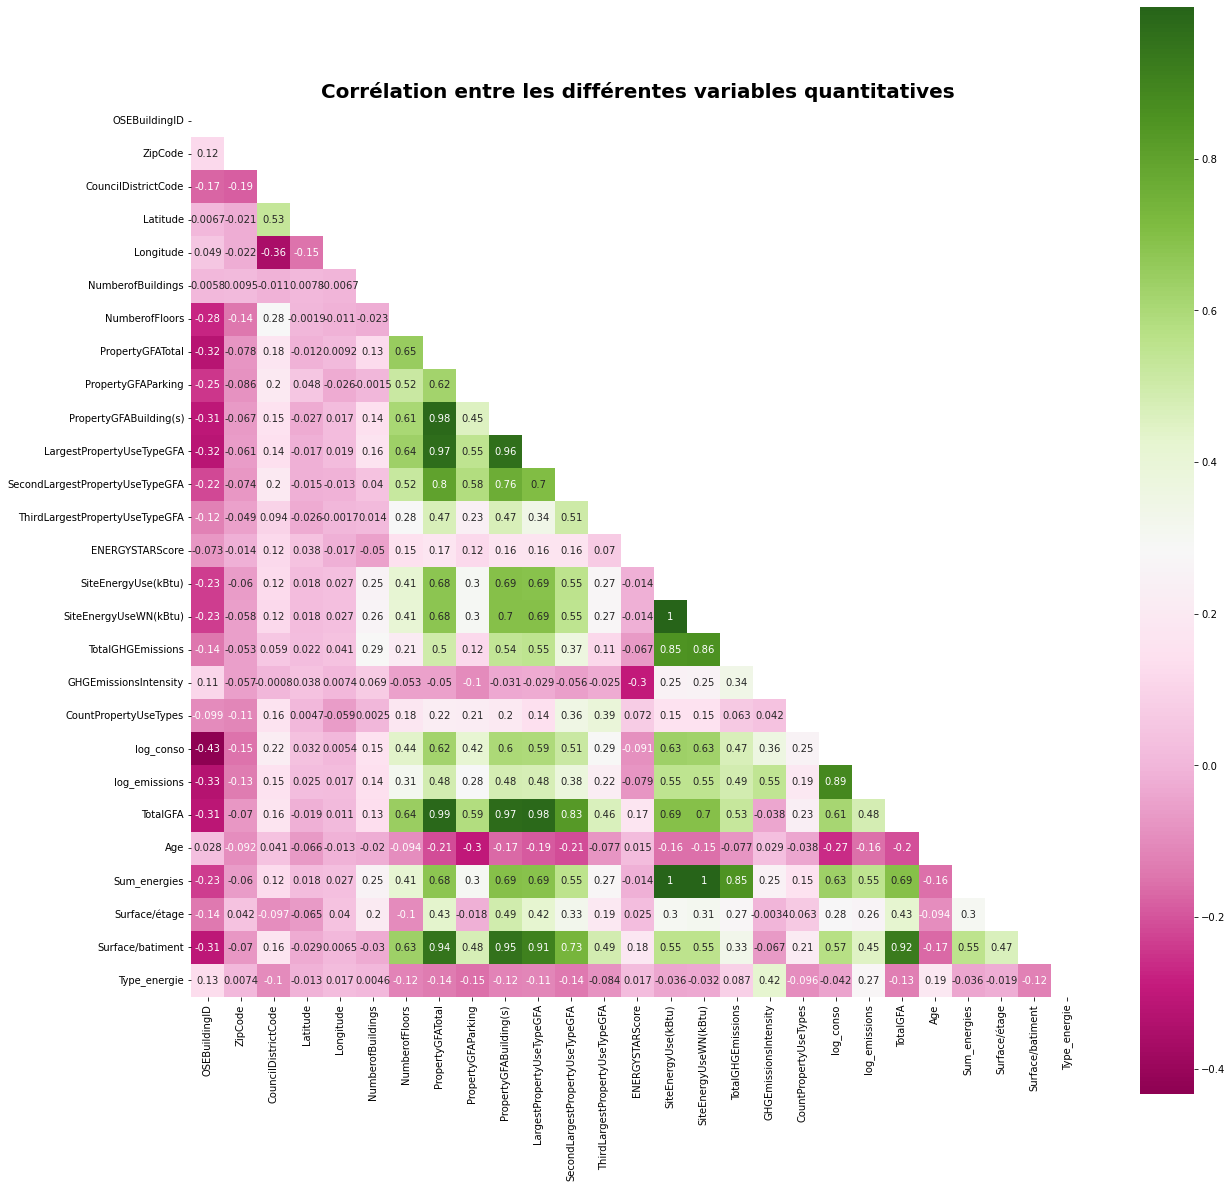

In [5]:
#Heatmap des corrélation

upp_mat = np.triu(data.corr())

fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(data.corr(),annot = True,square=True, mask = upp_mat, cmap="PiYG");
plt.title('Corrélation entre les différentes variables quantitatives', size = 20, fontweight = 'bold')

plt.savefig('Heatmap_correlations_P4.png')

On va supprimer les variables corrélées à notre variable cible.

In [6]:
#Variables corrélées > 0.7
var_corr = ['PropertyGFATotal', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA', 'TotalGFA', 
            'SiteEnergyUseWN(kBtu)', 'Sum_energies']

#On supprime ces variables
df = data.copy()
df = df.drop(var_corr, axis = 1).set_index('OSEBuildingID')

In [7]:
#Variables qu'il reste :
df.columns.to_list()

['BuildingType',
 'PrimaryPropertyType',
 'Address',
 'ZipCode',
 'TaxParcelIdentificationNumber',
 'CouncilDistrictCode',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFAParking',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEnergyUse(kBtu)',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity',
 'CountPropertyUseTypes',
 'Error Buildings',
 'log_conso',
 'log_emissions',
 'Age',
 'PropertyType',
 'Surface/étage',
 'Surface/batiment',
 'Type_energie']

# 3) Sélection features

In [8]:
#Sélection de nos features pour modélisation
features = ['Age', 'PropertyType', 'PropertyGFAParking', 'Neighborhood', 'ZipCode',
            'ThirdLargestPropertyUseTypeGFA', 'NumberofBuildings', 'NumberofFloors',
           'CountPropertyUseTypes', 'Surface/étage', 'Surface/batiment', 'Type_energie']

target_1 = ['SiteEnergyUse(kBtu)']
target_2 = ['log_conso']

In [9]:
display(df[features].head())
display(df[target_1].head())
df[features].dtypes

,Age,PropertyType,PropertyGFAParking,Neighborhood,ZipCode,ThirdLargestPropertyUseTypeGFA,NumberofBuildings,NumberofFloors,CountPropertyUseTypes,Surface/étage,Surface/batiment,Type_energie
OSEBuildingID,,,,,,,,,,,,
1,89,Hotel,0,DOWNTOWN,98101.0,0.0,1.0,12,1.0,7369.500000,88434.0,1.0
2,20,Hotel,15064,DOWNTOWN,98101.0,4622.0,1.0,11,3.0,8045.636364,88502.0,2.0
3,47,Hotel,196718,DOWNTOWN,98101.0,0.0,1.0,41,1.0,18521.756098,759392.0,1.0
5,90,Hotel,0,DOWNTOWN,98101.0,0.0,1.0,10,1.0,6132.000000,61320.0,1.0
8,36,Hotel,62000,DOWNTOWN,98121.0,0.0,1.0,18,3.0,6310.000000,113580.0,2.0


,SiteEnergyUse(kBtu)
OSEBuildingID,
1,7226362.5
2,8387933.0
3,72587024.0
5,6794584.0
8,14172606.0


Age                                 int64
PropertyType                       object
PropertyGFAParking                  int64
Neighborhood                       object
ZipCode                           float64
ThirdLargestPropertyUseTypeGFA    float64
NumberofBuildings                 float64
NumberofFloors                      int64
CountPropertyUseTypes             float64
Surface/étage                     float64
Surface/batiment                  float64
Type_energie                      float64
dtype: object

## 3.1) Observation des variables catégorielles

In [10]:
#Création de deux variables contenant les features de type numérique ou catégorielle
num_features = df[features].select_dtypes(include = ['int64', 'float64'])
cat_features = df[features].select_dtypes(include = 'object')

In [11]:
#Affichage des différentes variables numériques et catégorielles
print('Variables numériques:')
display(num_features.columns)
print('Variables catégorielles:')
display(cat_features.columns)

Variables numériques:


Index(['Age', 'PropertyGFAParking', 'ZipCode',
       'ThirdLargestPropertyUseTypeGFA', 'NumberofBuildings', 'NumberofFloors',
       'CountPropertyUseTypes', 'Surface/étage', 'Surface/batiment',
       'Type_energie'],
      dtype='object')

Variables catégorielles:


Index(['PropertyType', 'Neighborhood'], dtype='object')

In [12]:
#Affichons les valeurs uniques des variables catégorielles
for col in cat_features:
    print(cat_features[col].unique())

['Hotel' 'Other' 'Mixed Use Property' 'University' 'Office'
 'Warehouse_Storage' 'K-12 School' 'Hospital_Medical Office' 'Food Store'
 'Worship Facility' 'Laboratory' 'Restaurant']
['DOWNTOWN' 'NORTHEAST' 'EAST' 'LAKE UNION' 'GREATER DUWAMISH'
 'MAGNOLIA / QUEEN ANNE' 'BALLARD' 'NORTHWEST' 'CENTRAL' 'SOUTHEAST'
 'NORTH' 'DELRIDGE' 'SOUTHWEST']


In [13]:
display(cat_features.columns)
for col in cat_features:
    display('Colonne: ' + col)
    display(cat_features[col].value_counts())

Index(['PropertyType', 'Neighborhood'], dtype='object')

'Colonne: PropertyType'

Office                     427
Warehouse_Storage          249
Other                      196
Food Store                 105
Mixed Use Property         102
K-12 School                 86
Hotel                       67
Worship Facility            58
Hospital_Medical Office     39
University                  15
Restaurant                  12
Laboratory                   7
Name: PropertyType, dtype: int64

'Colonne: Neighborhood'

DOWNTOWN                 315
GREATER DUWAMISH         298
LAKE UNION               134
MAGNOLIA / QUEEN ANNE    121
EAST                      96
NORTHEAST                 86
NORTHWEST                 66
BALLARD                   61
NORTH                     48
CENTRAL                   38
SOUTHEAST                 36
DELRIDGE                  33
SOUTHWEST                 31
Name: Neighborhood, dtype: int64

Nous avons besoin de transformer nos variables qualitatives en variables numériques afin de les exploiter pour notre modélisation. La méthode que nous allons utiliser pour la transformation est le **codage disjonctif complet**. C'est-à-dire qu'à chacune de nos modalités, nous allons associer une variable indicatrice = *dummy variable*. 

## 3.2) Encodage des variables catégorielles et standardisation des variables quantitatives
### 3.2.1) Pandas get_dummies

In [14]:
#Créer et ajouter des colonnes (dummies) binaires indiquant (1) ou non (0) la donnée
col_to_encode = cat_features.columns

df_dum = pd.get_dummies(df[features], columns = col_to_encode)
display(df_dum.columns)
df_dum.head()
df_dum.shape

Index(['Age', 'PropertyGFAParking', 'ZipCode',
       'ThirdLargestPropertyUseTypeGFA', 'NumberofBuildings', 'NumberofFloors',
       'CountPropertyUseTypes', 'Surface/étage', 'Surface/batiment',
       'Type_energie', 'PropertyType_Food Store',
       'PropertyType_Hospital_Medical Office', 'PropertyType_Hotel',
       'PropertyType_K-12 School', 'PropertyType_Laboratory',
       'PropertyType_Mixed Use Property', 'PropertyType_Office',
       'PropertyType_Other', 'PropertyType_Restaurant',
       'PropertyType_University', 'PropertyType_Warehouse_Storage',
       'PropertyType_Worship Facility', 'Neighborhood_BALLARD',
       'Neighborhood_CENTRAL', 'Neighborhood_DELRIDGE',
       'Neighborhood_DOWNTOWN', 'Neighborhood_EAST',
       'Neighborhood_GREATER DUWAMISH', 'Neighborhood_LAKE UNION',
       'Neighborhood_MAGNOLIA / QUEEN ANNE', 'Neighborhood_NORTH',
       'Neighborhood_NORTHEAST', 'Neighborhood_NORTHWEST',
       'Neighborhood_SOUTHEAST', 'Neighborhood_SOUTHWEST'],
      dt

(1363, 35)

In [15]:
from sklearn.preprocessing import StandardScaler

#Sélection colonnes à standardiser
col_to_scale = num_features.columns
data_to_scale = df_dum[col_to_scale]

#Initialisation de StandardScaler()
std_scale = StandardScaler()

#Standardisation des colonnes sélectionnées
df_dum[col_to_scale] = std_scale.fit_transform(data_to_scale)

In [16]:
display(df_dum.head())

,Age,PropertyGFAParking,ZipCode,ThirdLargestPropertyUseTypeGFA,NumberofBuildings,NumberofFloors,CountPropertyUseTypes,Surface/étage,Surface/batiment,Type_energie,...,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
1,1.035187,-0.326362,-0.789445,-0.214782,-0.097499,1.121610,-0.774043,-0.414565,-0.048123,-0.560285,...,1,0,0,0,0,0,0,0,0,0
2,-1.049350,0.006934,-0.789445,0.094455,-0.097499,0.976181,0.824473,-0.403544,-0.047716,1.590895,...,1,0,0,0,0,0,0,0,0,0
3,-0.233662,4.026093,-0.789445,-0.214782,-0.097499,5.339065,-0.774043,-0.232778,3.967384,-0.560285,...,1,0,0,0,0,0,0,0,0,0
5,1.065397,-0.326362,-0.789445,-0.214782,-0.097499,0.830751,-0.774043,-0.434737,-0.210393,-0.560285,...,1,0,0,0,0,0,0,0,0,0
8,-0.565979,1.045410,0.231247,-0.214782,-0.097499,1.994187,0.824473,-0.431836,0.102369,1.590895,...,1,0,0,0,0,0,0,0,0,0


### 3.2.2) Sklearn OneHotEncoder

In [17]:
from sklearn.preprocessing import OneHotEncoder

#Initialisation encodage
ohe = OneHotEncoder(handle_unknown='ignore')

#Transformation données qualitatives
ohe_qual = ohe.fit_transform(cat_features)

In [18]:
cat_features['PropertyType'].value_counts()

Office                     427
Warehouse_Storage          249
Other                      196
Food Store                 105
Mixed Use Property         102
K-12 School                 86
Hotel                       67
Worship Facility            58
Hospital_Medical Office     39
University                  15
Restaurant                  12
Laboratory                   7
Name: PropertyType, dtype: int64

In [19]:
#Créer des noms pour les variables qualitatives nouvellement encodées
col_names_qual = []
for i, categories in enumerate(ohe.categories_):
    col_names_qual.extend([f'{cat_features.columns[i]}_{cat}' for cat in categories])

#Concaténation avec les données quantitatives
onehot = np.concatenate([ohe_qual.toarray(), df_dum[col_to_scale]], axis=1)

#On convertir nos résultats en dataframe
df_ohe = pd.DataFrame(onehot, columns=col_names_qual + list(df_dum[col_to_scale].columns))

display(df_ohe.head())
df_ohe.columns

,PropertyType_Food Store,PropertyType_Hospital_Medical Office,PropertyType_Hotel,PropertyType_K-12 School,PropertyType_Laboratory,PropertyType_Mixed Use Property,PropertyType_Office,PropertyType_Other,PropertyType_Restaurant,PropertyType_University,...,Age,PropertyGFAParking,ZipCode,ThirdLargestPropertyUseTypeGFA,NumberofBuildings,NumberofFloors,CountPropertyUseTypes,Surface/étage,Surface/batiment,Type_energie
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.035187,-0.326362,-0.789445,-0.214782,-0.097499,1.121610,-0.774043,-0.414565,-0.048123,-0.560285
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.049350,0.006934,-0.789445,0.094455,-0.097499,0.976181,0.824473,-0.403544,-0.047716,1.590895
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.233662,4.026093,-0.789445,-0.214782,-0.097499,5.339065,-0.774043,-0.232778,3.967384,-0.560285
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.065397,-0.326362,-0.789445,-0.214782,-0.097499,0.830751,-0.774043,-0.434737,-0.210393,-0.560285
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.565979,1.045410,0.231247,-0.214782,-0.097499,1.994187,0.824473,-0.431836,0.102369,1.590895


Index(['PropertyType_Food Store', 'PropertyType_Hospital_Medical Office',
       'PropertyType_Hotel', 'PropertyType_K-12 School',
       'PropertyType_Laboratory', 'PropertyType_Mixed Use Property',
       'PropertyType_Office', 'PropertyType_Other', 'PropertyType_Restaurant',
       'PropertyType_University', 'PropertyType_Warehouse_Storage',
       'PropertyType_Worship Facility', 'Neighborhood_BALLARD',
       'Neighborhood_CENTRAL', 'Neighborhood_DELRIDGE',
       'Neighborhood_DOWNTOWN', 'Neighborhood_EAST',
       'Neighborhood_GREATER DUWAMISH', 'Neighborhood_LAKE UNION',
       'Neighborhood_MAGNOLIA / QUEEN ANNE', 'Neighborhood_NORTH',
       'Neighborhood_NORTHEAST', 'Neighborhood_NORTHWEST',
       'Neighborhood_SOUTHEAST', 'Neighborhood_SOUTHWEST', 'Age',
       'PropertyGFAParking', 'ZipCode', 'ThirdLargestPropertyUseTypeGFA',
       'NumberofBuildings', 'NumberofFloors', 'CountPropertyUseTypes',
       'Surface/étage', 'Surface/batiment', 'Type_energie'],
      dtype='ob

# 4) Modélisation
## 4.1) Régression linéaire

In [20]:
import statsmodels.api as smf
from statsmodels.formula.api import ols

X = df_dum
y = df[target_2]

In [21]:
#Train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                   y, 
                                                   test_size = 0.3, #% de données dans le test
                                                   random_state = 0)

In [22]:
from sklearn.linear_model import LinearRegression

#Ajustement du modèle de régression linéaire
reg_lin = LinearRegression()
model_reg_lin = reg_lin.fit(X_train, y_train)

In [23]:
#Prédictions des valeurs cibles sur les données d'entrainement
y_train['Conso_pred'] = reg_lin.predict(X_train) #Création d'une colonne de prédictions des données d'entrainement

### a) Validation des performances du modèle

In [24]:
X = smf.add_constant(X) #Ajout d'une constante à l'ensemble des données
model = smf.OLS(y, X).fit() #Création et entrainement du modèle de régression linéaire sur les données
model.summary() #Affichage des résultats de la régression

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_conso   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     53.70
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          6.68e-218
Time:                        19:55:26   Log-Likelihood:                -554.45
No. Observations:                1363   AIC:                             1177.
Df Residuals:                    1329   BIC:                             1354.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    5.6345      0.019    302.898      0.000       5.598       5.671
Age                                     -0.0965      0.012     -8.205      0.000      -0.120      -0.073
PropertyGFAParking                       0.0439      0.013      3.361      0.001       0.018       0.069
ZipCode                                 -0.0247      0.011     -2.208      0.027      -0.047      -0.003
ThirdLargestPropertyUseTypeGFA          -0.0053      0.013     -0.421      0.674      -0.030       0.019
NumberofBuildings                        0.0761      0.011      7.069      0.000       0.055       0.097
NumberofFloors                           0.0401      0.017      2.320      0.020       0.006       0.074
CountPropertyUseTypes                    0.0700      0.013      5.593      0.000       0.045       0.095
Surface/étage                            0.0590      0.015      3.881      0.000       0.029       0.089
Surface/batiment                         0.1822      0.021      8.781      0.000       0.142       0.223
Type_energie                             0.0528      0.011      4.788      0.000       0.031       0.074
PropertyType_Food Store                  0.5579      0.039     14.389      0.000       0.482       0.634
PropertyType_Hospital_Medical Office     0.7491      0.060     12.518      0.000       0.632       0.866
PropertyType_Hotel                       0.5918      0.047     12.602      0.000       0.500       0.684
PropertyType_K-12 School                 0.4111      0.043      9.559      0.000       0.327       0.496
PropertyType_Laboratory                  1.1468      0.131      8.780      0.000       0.891       1.403
PropertyType_Mixed Use Property          0.3236      0.044      7.282      0.000       0.236       0.411
PropertyType_Office                      0.4122      0.026     15.565      0.000       0.360       0.464
PropertyType_Other                       0.4594      0.031     15.029      0.000       0.399       0.519
PropertyType_Restaurant                  0.5919      0.101      5.873      0.000       0.394       0.790
PropertyType_University                  0.3021      0.093      3.253      0.001       0.120       0.484
PropertyType_Warehouse_Storage           0.0578      0.032      1.780      0.075      -0.006       0.121
PropertyType_Worship Facility            0.0308      0.051      0.609      0.543      -0.068       0.130
Neighborhood_BALLARD                     0.3582      0.046      7.797      0.000       0.268       0.448
Neighborhood_CENTRAL                     0.4470      0.058      7.735      0.000       0.334       0.560
Neighborhood_DELRIDGE                    0.3930      0.062      6.390      0.000       0.272       0.514
Neighborhood_DOWNTOWN                 

A partir des coefficients et de leur p-value, on peut voir que la variable PropertyType_Laboratory est la variable contribuant le plus à la prédiction de la variable dépendante. Sa valeur est de 1.1340, cela signifie que l'augmentation d'une unité de la variable PropertyType_Laboratory entraine une augmentation de 1.134 unités la valeur de consommation.

A partir de nos données, on va chercher d'abord à enlever une des modalités nouvellement encodées (modalité de référence) sur nos variables catégorielles pour éviter la colinéarité (corrélations entre plusieurs variables indépendantes) car elle peut-être déduite des autres. Sinon, risque de redondance dans les informations fournies. Cela nous conduit à avoir k-1 variables indicatrices. 

In [25]:
#Si on enlève 1 variable indicatrice pour chaque variable catégorielle encodée
display(cat_features.nunique())
print('Il ne nous resterait', cat_features.nunique().iloc[0]-1, 'modalités à garder pour PropertyType')
print('Il ne nous resterait', cat_features.nunique().iloc[1]-1, 'modalités à garder pour Neighborhood')

PropertyType    12
Neighborhood    13
dtype: int64

Il ne nous resterait 11 modalités à garder pour PropertyType
Il ne nous resterait 12 modalités à garder pour Neighborhood


In [26]:
# Sélectionnons une modalité au hasard dans notre dataframe pour chaque feature catégorielle
import random

#On sélectionne aléatoirement le nom contenant 'PropertyType'
propertytype_col = [col1 for col1 in df_dum.columns if 'PropertyType' in col1]
neighbor_col = [col2 for col2 in df_dum.columns if 'Neighborhood' in col2]
random_col1 = random.choice(propertytype_col)
random_col2 = random.choice(neighbor_col)

In [27]:
#On affiche le nom de cette colonne
print(random_col1)
print(random_col2)

PropertyType_Office
Neighborhood_MAGNOLIA / QUEEN ANNE


In [28]:
#On va supprimer ces colonnes de notre df
df_dum = df_dum.drop([random_col1, random_col2], axis = 1)

In [29]:
#Recommençons notre stats models
X = df_dum
y = df[target_2]

In [30]:
X = smf.add_constant(X) #Ajout d'une constante à l'ensemble des données
model = smf.OLS(y, X).fit() #Création et entrainement du modèle de régression linéaire sur les données
model.summary() #Affichage des résultats de la régression

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_conso   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     53.70
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          6.68e-218
Time:                        19:55:26   Log-Likelihood:                -554.45
No. Observations:                1363   AIC:                             1177.
Df Residuals:                    1329   BIC:                             1354.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    6.4661      0.037    174.540      0.000       6.393       6.539
Age                                     -0.0965      0.012     -8.205      0.000      -0.120      -0.073
PropertyGFAParking                       0.0439      0.013      3.361      0.001       0.018       0.069
ZipCode                                 -0.0247      0.011     -2.208      0.027      -0.047      -0.003
ThirdLargestPropertyUseTypeGFA          -0.0053      0.013     -0.421      0.674      -0.030       0.019
NumberofBuildings                        0.0761      0.011      7.069      0.000       0.055       0.097
NumberofFloors                           0.0401      0.017      2.320      0.020       0.006       0.074
CountPropertyUseTypes                    0.0700      0.013      5.593      0.000       0.045       0.095
Surface/étage                            0.0590      0.015      3.881      0.000       0.029       0.089
Surface/batiment                         0.1822      0.021      8.781      0.000       0.142       0.223
Type_energie                             0.0528      0.011      4.788      0.000       0.031       0.074
PropertyType_Food Store                  0.1457      0.043      3.402      0.001       0.062       0.230
PropertyType_Hospital_Medical Office     0.3369      0.066      5.134      0.000       0.208       0.466
PropertyType_Hotel                       0.1796      0.050      3.572      0.000       0.081       0.278
PropertyType_K-12 School                -0.0010      0.049     -0.021      0.983      -0.097       0.095
PropertyType_Laboratory                  0.7347      0.142      5.191      0.000       0.457       1.012
PropertyType_Mixed Use Property         -0.0886      0.046     -1.909      0.056      -0.180       0.002
PropertyType_Other                       0.0472      0.034      1.377      0.169      -0.020       0.115
PropertyType_Restaurant                  0.1797      0.110      1.641      0.101      -0.035       0.395
PropertyType_University                 -0.1101      0.101     -1.087      0.277      -0.309       0.089
PropertyType_Warehouse_Storage          -0.3544      0.035    -10.088      0.000      -0.423      -0.285
PropertyType_Worship Facility           -0.3814      0.057     -6.691      0.000      -0.493      -0.270
Neighborhood_BALLARD                    -0.0612      0.059     -1.028      0.304      -0.178       0.056
Neighborhood_CENTRAL                     0.0277      0.070      0.398      0.691      -0.109       0.164
Neighborhood_DELRIDGE                   -0.0263      0.074     -0.356      0.722      -0.172       0.119
Neighborhood_DOWNTOWN                    0.1498      0.044      3.391      0.001       0.063       0.236
Neighborhood_EAST                     

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Calcul des VIF pour chaque variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [32]:
print(vif.sort_values(by='VIF Factor', ascending=False))

    VIF Factor                              features
0    13.808888                                 const
9     4.334378                      Surface/batiment
25    3.486675                 Neighborhood_DOWNTOWN
27    3.064044         Neighborhood_GREATER DUWAMISH
6     2.999689                        NumberofFloors
8     2.321132                         Surface/étage
28    2.105238               Neighborhood_LAKE UNION
26    1.874664                     Neighborhood_EAST
20    1.854364        PropertyType_Warehouse_Storage
30    1.765295                Neighborhood_NORTHEAST
2     1.714151                    PropertyGFAParking
4     1.597130        ThirdLargestPropertyUseTypeGFA
7     1.576575                 CountPropertyUseTypes
31    1.535965                Neighborhood_NORTHWEST
22    1.522606                  Neighborhood_BALLARD
16    1.498570       PropertyType_Mixed Use Property
17    1.457273                    PropertyType_Other
14    1.418644              PropertyType_K-12 

On va maintenant garder uniquement les variables significatives à 5%. 

In [33]:
# Si on garde uniquement les variables dont la p-value est < 0.05 et suppression de la constante
var_significant = list(model.pvalues[model.pvalues < 0.05].index)
var_significant.remove('const')
print(var_significant)

['Age', 'PropertyGFAParking', 'ZipCode', 'NumberofBuildings', 'NumberofFloors', 'CountPropertyUseTypes', 'Surface/étage', 'Surface/batiment', 'Type_energie', 'PropertyType_Food Store', 'PropertyType_Hospital_Medical Office', 'PropertyType_Hotel', 'PropertyType_Laboratory', 'PropertyType_Warehouse_Storage', 'PropertyType_Worship Facility', 'Neighborhood_DOWNTOWN', 'Neighborhood_LAKE UNION', 'Neighborhood_NORTH']


In [34]:
# A partir de cette liste, on va garder dans notre df uniquement les variables significatives (p-value < 0.05)
df_dum = df_dum[var_significant]

In [35]:
#Recommençons notre stats models
X = df_dum
y = df[target_2]

In [36]:
X = smf.add_constant(X) #Ajout d'une constante à l'ensemble des données
model_res_lin = smf.OLS(y, X).fit() #Création et entrainement du modèle de régression linéaire sur les données
model_res_lin.summary() #Affichage des résultats de la régression

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_conso   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     96.62
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          5.28e-227
Time:                        19:55:27   Log-Likelihood:                -566.04
No. Observations:                1363   AIC:                             1170.
Df Residuals:                    1344   BIC:                             1269.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    6.4800      0.017    385.204      0.000       6.447       6.513
Age                                     -0.0941      0.011     -8.230      0.000      -0.117      -0.072
PropertyGFAParking                       0.0460      0.013      3.538      0.000       0.020       0.071
ZipCode                                 -0.0240      0.011     -2.235      0.026      -0.045      -0.003
NumberofBuildings                        0.0748      0.011      7.069      0.000       0.054       0.096
NumberofFloors                           0.0425      0.017      2.479      0.013       0.009       0.076
CountPropertyUseTypes                    0.0568      0.011      5.348      0.000       0.036       0.078
Surface/étage                            0.0592      0.015      3.954      0.000       0.030       0.089
Surface/batiment                         0.1798      0.019      9.350      0.000       0.142       0.217
Type_energie                             0.0566      0.011      5.281      0.000       0.036       0.078
PropertyType_Food Store                  0.1450      0.039      3.695      0.000       0.068       0.222
PropertyType_Hospital_Medical Office     0.3429      0.062      5.545      0.000       0.222       0.464
PropertyType_Hotel                       0.1750      0.049      3.600      0.000       0.080       0.270
PropertyType_Laboratory                  0.7309      0.141      5.178      0.000       0.454       1.008
PropertyType_Warehouse_Storage          -0.3449      0.028    -12.115      0.000      -0.401      -0.289
PropertyType_Worship Facility           -0.3890      0.052     -7.440      0.000      -0.492      -0.286
Neighborhood_DOWNTOWN                    0.1375      0.030      4.523      0.000       0.078       0.197
Neighborhood_LAKE UNION                  0.0857      0.037      2.302      0.021       0.013       0.159
Neighborhood_NORTH                      -0.1391      0.055     -2.519      0.012      -0.247      -0.031
==============================================================================
Omnibus:                       20.503   Durbin-Watson:                   1.571
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.438
Skew:                          -0.097   Prob(JB):                     5.48e-08
Kurtosis:                       3.742   Cond. No.                         21.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

La valeur de **Prob(F-statistic)** est très faible et inférieure au seuil alpha = 0.05. On rejette donc l'hypothèse nulle indiquant que les coefficients sont nuls. Il est donc peu probable que la relation entre les variables indépendantes et la variable dépendante soit due au hasard. Il existe donc une relation significative entre les variables indépendantes et la variable dépendante. 

Le **R² ajusté** étant la version ajustée du R², mesure la proportion de la variance de la variable dépendante. Notre R² étant supérieur à 0.5, le modèle de régression linéaire est acceptable. 

Les valeurs de coefficients représentent la relation entre chacune des variables indépendantes avec la variable dépendante. Ils correspondent aux estimations de la pentre de la droite de régression, soit le changement moyen de la variable dépendante quand la variable indépendante change d'une unité. 

### b) Tests d'hypothèse par analyse des résidus

**Normalité de la distribution des résidus** : "Omnibus" teste l'hypothèse de la normalité des résidus. Plus la valeur de Prob(Omnibus) est proche de 1, plus la normalité est vérifiée. Le test de "Jarque-Bera" évalue lui aussi la normalité des résidus. Il se base sur l'asymétrie (skewness) et l'applatissement (Kurtosis). Lorsque l'applatissement est égal à 3, la distribution suit une loi normale, un coefficient inférieur à 3 indique que la distribution est plus aplatie que la loi normale (platykurtique) et un coeffcient supérieur à 3 indique que la distribution est pointue (letpokurtique). Dans notre cas, l'aplatissement est supérieur à 3. Pour l'asymétrie, lorsque le coefficient est nul, cela signifie que la distribution est symétrique et suit la loi normale. Dans le cas où le coefficient est négatif, la distribution est asymétrique et décalée à droite de la médiane. Lorsqu'il est positif, la distribution est asymétrique et décalée à gauche de la médiane. Dans notre cas, le coefficient de Skewness est négatif. La valeur de la statistique du test de Jarque-Bera est élevée et confirme donc la non normalité des résidus. 

**Homoscédasticité** : les tests de Levene, Breusch-Pagan et White permettent de tester l'homoscédasticité. L'hypothèse nulle est que les résidus sont homoscédastiques = variance constante des résidus. 

**Auto-corrélation (indépendance des erreurs)** : La statistique "Durbin-Watson" est utilisée pour comme test pour vérifier la corrélation automatique des résidus. L'hypothèse nulle stipule qu'il n'y a pas d'autocorrélation. Si la statistique D-W est égale à 2, alors il n'y a pas d'autocorrélation, si elle située entre 0 et 2, alors il y a une autocorrélation positive et si elle est comprise entre 2 et 4, alors on a une autocorrélation négative. Dans notre cas, la valeur est comprise entre 0 et 2. Il y a donc une autocorrélation positive. 

**Multicolinéarité** : renseignée par le "Condition Number". Une valeur élevée du "Condition Number" indique un risque élevé de multicolinéarité. Notre Condition Number a diminué après suppression d'une variable encodée pour chaque variable catégorielle et d'une et suppression des variables non pertinentes. Des méthode de régularisation peuvent permettre de réduire la multicolinéarité (Ridge et Lasso). Le calcul du VIF (variance inflation factor) permet de mesurer la colinéarité entre les exogènes, donc la liaison de chaque variable indépendante avec une combinaison linéaire des autres variables indépendantes.

**Linéarité** : il existe une relation linéaire entre les variables indépendantes et la variable dépendante. 

**Ajustement du modèle** : AIC et BIC 

In [37]:
#Calcul des VIF pour chaque variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [38]:
print(vif.sort_values(by='VIF Factor', ascending=False))

    VIF Factor                              features
8     3.698454                      Surface/batiment
5     2.944167                        NumberofFloors
0     2.830929                                 const
7     2.240738                         Surface/étage
2     1.691018                    PropertyGFAParking
16    1.643380                 Neighborhood_DOWNTOWN
1     1.308985                                   Age
17    1.230030               Neighborhood_LAKE UNION
14    1.210637        PropertyType_Warehouse_Storage
3     1.154347                               ZipCode
9     1.147112                          Type_energie
6     1.128137                 CountPropertyUseTypes
4     1.119121                     NumberofBuildings
15    1.114210         PropertyType_Worship Facility
12    1.104791                    PropertyType_Hotel
10    1.095054               PropertyType_Food Store
11    1.063225  PropertyType_Hospital_Medical Office
18    1.036463                    Neighborhood

La calcul du VIF montre la faible multicollinéarité entre les différentes variables explicatives. 

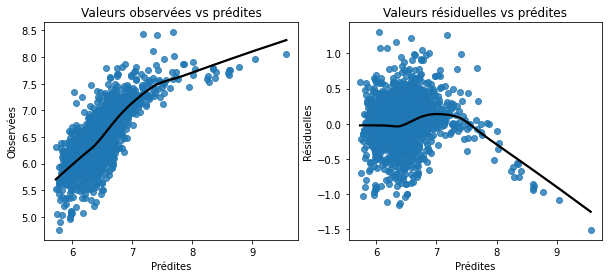

In [39]:
# Linearite:
def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2,figsize=(10,4))
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'black'})
    ax[0].set_title("Valeurs observées vs prédites")
    ax[0].set(xlabel="Prédites", ylabel="Observées")

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'black'})
    ax[1].set_title("Valeurs résiduelles vs prédites")
    ax[1].set(xlabel="Prédites", ylabel="Résiduelles")
    
linearity_test(model, y)

La relation n'est pas linéaire. L'hypothèse de linéarité n'est pas vérifiée. 

La p-value du test d'Aderson-Darling vaux 0.00024687905605189596


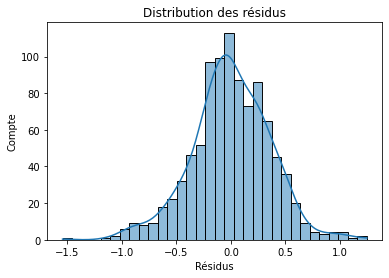

In [40]:
from statsmodels.stats.diagnostic import het_white , normal_ad

# Creation d'une colonne contenant les residus:
y_train["residual"] = y_train["log_conso"] - y_train["Conso_pred"]

# Normalite:
print("La p-value du test d'Aderson-Darling vaux", normal_ad(y_train["residual"])[1])

# Graphique:
sns.histplot(y_train["residual"], kde=True)
plt.xlabel("Résidus")
plt.ylabel("Compte")
plt.title("Distribution des résidus")
plt.show()

La p-value d'Anderson-Darling est inférieure au seuil de 0.05, donc on rejette l'hypothèse nulle. Les données ne suivent pas une loi normale. 

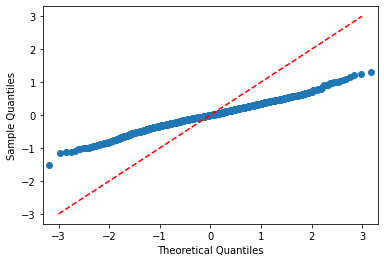

In [41]:
import statsmodels.api as sm
sm.qqplot(model.resid)
# Ajouter une ligne rouge pour les valeurs qui se trouvent à plus de 3 écarts-types de la moyenne
plt.plot([-3, 3], [-3, 3], 'r--')
plt.show()

Les valeurs ne suivent pas la ligne rouge représentant les valeurs attendues pour une distribution normale. 

In [42]:
# Homoscédasticité:
#Test de white
white_test = het_white(model.resid, model.model.exog)
labels_white_test = ["Test Statistique", "p-value", "F-Statistique", "F-Test p-value"]
print(dict(zip(labels_white_test, white_test)))

{'Test Statistique': 659.9317647919781, 'p-value': 2.1804555077573666e-15, 'F-Statistique': 2.2815939821183147, 'F-Test p-value': 6.137452326993508e-25}


Nous utilisons le test de White pour vérifier l'homoscédasticité des résidus. L'hypothèse nulle stipule qu'il y a homoscédasticité des résidus. Dans notre cas, la p-value est inférieure au risque de 5%, l'hypothèse nulle est donc rejetée. Le modèle est hétéroscédastique, les résidus ne sont pas également dispersés. 

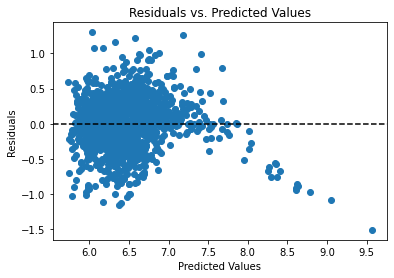

In [43]:
# Plot the residuals vs. the predicted values
plt.scatter(model.predict(),model.resid)
plt.axhline(y=0, color='k', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [44]:
# Affichage des résidus studentisés 
infl = model.get_influence()

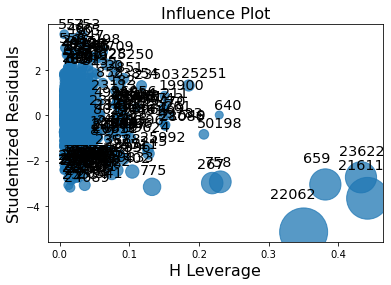

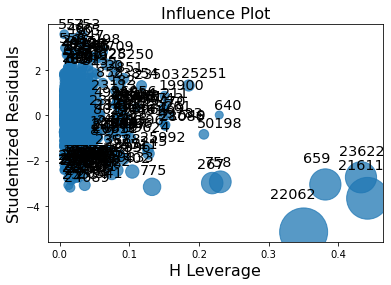

In [45]:
#regardons s'il y a des points suspects
sm.graphics.influence_plot(model)

En abscisses, on a le levier, et résidus studentisés en ordonnées. 

La grosseur des points est basée sur la distance de Cook : influence des observations sur les prédictions du modèle. Il faudrait examiner les observations influentes. 

In [46]:
# Sélectionnons une modalité au hasard dans notre dataframe pour chaque feature catégorielle
import random

#On sélectionne aléatoirement le nom contenant 'PropertyType'
propertytype_col_ohe = [col1 for col1 in df_ohe.columns if 'PropertyType' in col1]
neighbor_col_ohe = [col2 for col2 in df_ohe.columns if 'Neighborhood' in col2]
random_col1_ohe = random.choice(propertytype_col)
random_col2_ohe = random.choice(neighbor_col)

In [47]:
#On va supprimer ces colonnes de notre df
df_ohe = df_ohe.drop([random_col1_ohe, random_col2_ohe], axis = 1)

In [48]:
results = {}

### 4.1.1) Pour les variables catégorielles encodées par get_dummies

In [49]:
import time
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
#Création variables X et Y
X = df_dum
y = df[target_1]

### a) Séparation du jeu de données

In [51]:
#Train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                   y, 
                                                   test_size = 0.3, #% de données dans le test
                                                   random_state = 0)

In [52]:
print('Notre X_train est de forme', X_train.shape, 'et y_train est de forme', y_train.shape)
print('Notre X_test est de forme', X_test.shape, 'et y_test est de forme', y_test.shape)

Notre X_train est de forme (954, 18) et y_train est de forme (954, 1)
Notre X_test est de forme (409, 18) et y_test est de forme (409, 1)


#### a.1. Pour les targets non transformées

In [53]:
#Ajustement du modèle de régression linéaire
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [54]:
#Prédictions des valeurs cibles sur les données de test et d'entrainement
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [55]:
#Création d'une fonction affichant le score r2, la mse et rmse d'un modèle de régression linéaire
#données entrainement et données de test
start = time.perf_counter()
def calc_scores(y_train, y_train_pred, y_test, y_test_pred):

    #Calcul du score R2 pour les données d'entrainement et de test
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    #Calcul de la moyenne des erreurs carrées
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    #Calcul de la racine carrée de la moyenne des erreurs carrées
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    
    print('Pour les données d\'entrainement :')
    print('Score R2 pour les données d\'entrainement:', round(r2_train, 3))
    print('MSE pour les données d\'entrainement:', round(mse_train, 3))
    print('RMSE pour les données d\'entrainement:', round(rmse_train, 3))
    print('--------------------------------')
    print('Pour les données de test')
    print('Score R2 pour les données de test:', round(r2_test, 3))
    print('MSE pour les données d\'entrainement:', round(mse_test, 3))
    print('RMSE pour les données d\'entrainement:', round(rmse_test, 3))
    
    print('------------------')
    end = time.perf_counter()
    print('Temps d\'exécution: ', end-start, 'secondes.')

In [56]:
#Affichons les scores pour les données d'entrainement et de test
calc_scores(y_train, y_train_pred, y_test, y_test_pred)

Pour les données d'entrainement :
Score R2 pour les données d'entrainement: 0.497
MSE pour les données d'entrainement: 150885459728420.44
RMSE pour les données d'entrainement: 12283544.266
--------------------------------
Pour les données de test
Score R2 pour les données de test: 0.286
MSE pour les données d'entrainement: 225768694641749.1
RMSE pour les données d'entrainement: 15025601.307
------------------
Temps d'exécution:  0.03289819999999821 secondes.


On va regarder dans un premier temps, si un changement de résultat est visible lorsqu'on transformer les valeurs de target par le logarithme

#### a.2. Pour les targets ayant été transformées par le log

In [57]:
#On crée à nouveau nos variables
#Création variables X et Y
X = df_dum
y = df[target_2]

In [58]:
#On sépare à nouveau notre jeu de données
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                   y, 
                                                   test_size = 0.3, #% de données dans le test
                                                   random_state = 0)

In [59]:
#Ajustement du modèle de régression linéaire
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [60]:
#Prédictions des valeurs cibles sur les données de test et d'entrainement
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [61]:
#Affichons les scores pour les données d'entrainement et de test (target transformées en log)
calc_scores(y_train, y_train_pred, y_test, y_test_pred)

Pour les données d'entrainement :
Score R2 pour les données d'entrainement: 0.569
MSE pour les données d'entrainement: 0.133
RMSE pour les données d'entrainement: 0.364
--------------------------------
Pour les données de test
Score R2 pour les données de test: 0.523
MSE pour les données d'entrainement: 0.146
RMSE pour les données d'entrainement: 0.383
------------------
Temps d'exécution:  0.1387264999999971 secondes.


On observe une amélioration du score pour les données d'entrainement, mais avec un score r2_train > r2_test. Nous sommes probablement dans une situation de surapprentissage des données d'entrainement. 

On va continuer notre modélisation en ne gardant que les données de consommation transformées par le logarithme. 

### 4.1.2) Pour les variables catégorielles encodées par OneHotEncoder

In [62]:
#Création variables X et Y
X = df_ohe
y = df[target_2]

### a) Séparation du jeu de données

In [63]:
#Train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                   y, 
                                                   test_size = 0.3, #% de données dans le test
                                                   random_state = 0)

In [64]:
print('Notre X_train est de forme', X_train.shape, 'et y_train est de forme', y_train.shape)
print('Notre X_test est de forme', X_test.shape, 'et y_test est de forme', y_test.shape)

Notre X_train est de forme (954, 33) et y_train est de forme (954, 1)
Notre X_test est de forme (409, 33) et y_test est de forme (409, 1)


In [65]:
#Ajustement du modèle de régression linéaire
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [66]:
#Prédictions des valeurs cibles sur les données de test et d'entrainement
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [67]:
#Affichons les scores pour les données d'entrainement et de test (target transformées en log)
calc_scores(y_train, y_train_pred, y_test, y_test_pred)

Pour les données d'entrainement :
Score R2 pour les données d'entrainement: 0.583
MSE pour les données d'entrainement: 0.129
RMSE pour les données d'entrainement: 0.359
--------------------------------
Pour les données de test
Score R2 pour les données de test: 0.476
MSE pour les données d'entrainement: 0.161
RMSE pour les données d'entrainement: 0.401
------------------
Temps d'exécution:  0.25790469999999743 secondes.


Nos valeurs de score sont presque similaires selon l'encodage par OneHotEncoder ou get_dummies, on va partir sur les données encodées par get_dummies.

### b) Validation set

In [68]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from numpy import sqrt
from numpy import mean
from numpy import absolute

In [69]:
#Initialisation modèle de régression linéaire
lr = LinearRegression()

#Entrainement du modèle avec données d'entrainement
lr.fit(X_train, y_train)

LinearRegression()

In [70]:
#On va créer une fonction calculant le MAPE (Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [71]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer

In [72]:
#Calcul des scores par validation croisée
scoring_methods = {'r2': make_scorer(r2_score),
          'mae': make_scorer(mean_absolute_error),
          'mse': make_scorer(mean_squared_error)}
cv = KFold(n_splits = 5)
reg_lin_score = cross_validate(lr, X_train, y_train, return_train_score = True, cv = cv, scoring = scoring_methods)


results['Linear_Regression'] = reg_lin_score

## 4.2) Modèle naïf (Dummy Regressor)

In [77]:
from sklearn.dummy import DummyRegressor

In [78]:
#Initialisation modèle Dummy Regressor
dummy = DummyRegressor(strategy="mean")

#Entrainement du modèle avec données d'entrainement
dummy.fit(X_train, y_train)

DummyRegressor()

In [79]:
#Prédictions des valeurs cibles sur les données de test et d'entrainement
y_train_pred = dummy.predict(X_train)
y_test_pred = dummy.predict(X_test)

In [80]:
#Calcul des scores sur l'ensemble des données 
dummy_reg = calc_scores(y_train, y_train_pred, y_test, y_test_pred)

Pour les données d'entrainement :
Score R2 pour les données d'entrainement: 0.0
MSE pour les données d'entrainement: 0.308
RMSE pour les données d'entrainement: 0.555
--------------------------------
Pour les données de test
Score R2 pour les données de test: -0.003
MSE pour les données d'entrainement: 0.308
RMSE pour les données d'entrainement: 0.555
------------------
Temps d'exécution:  0.5933731999999985 secondes.


In [81]:
#Calcul des scores par validation croisée
scoring_methods = {'r2': make_scorer(r2_score),
          'mae': make_scorer(mean_absolute_error),
          'mse': make_scorer(mean_squared_error)}
cv = KFold(n_splits = 5)
dummy_reg_score = cross_validate(dummy, X_train, y_train, return_train_score = True, cv = cv, scoring = scoring_methods)

results['Dummy_Regressor'] = dummy_reg_score

## 4.3) Ridge Regression

In [82]:
from sklearn.linear_model import Ridge

In [83]:
#Ajustement du modèle de Régression Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [84]:
#Prédictions des valeurs cibles sur les données de test et d'entrainement
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

In [85]:
#Calcul des scores sur l'ensemble des données 
ridge_reg = calc_scores(y_train, y_train_pred, y_test, y_test_pred)

Pour les données d'entrainement :
Score R2 pour les données d'entrainement: 0.581
MSE pour les données d'entrainement: 0.129
RMSE pour les données d'entrainement: 0.359
--------------------------------
Pour les données de test
Score R2 pour les données de test: 0.478
MSE pour les données d'entrainement: 0.16
RMSE pour les données d'entrainement: 0.4
------------------
Temps d'exécution:  0.7745392999999972 secondes.


In [86]:
#Calcul des scores par validation croisée
scoring_methods = {'r2': make_scorer(r2_score),
          'mae': make_scorer(mean_absolute_error),
          'mse': make_scorer(mean_squared_error)}
cv = KFold(n_splits = 5)
ridge_reg_score = cross_validate(ridge, X_train, y_train, return_train_score = True, cv = cv, scoring = scoring_methods)

results['Ridge_Regression'] = ridge_reg_score

## 4.4) Lasso

In [90]:
from sklearn.linear_model import Lasso

In [91]:
#Ajustement du modèle Lasso
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [92]:
#Prédictions des valeurs cibles sur les données de test et d'entrainement
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

In [93]:
#Calcul des scores sur l'ensemble des données 
lasso_reg = calc_scores(y_train, y_train_pred, y_test, y_test_pred)

Pour les données d'entrainement :
Score R2 pour les données d'entrainement: 0.319
MSE pour les données d'entrainement: 0.21
RMSE pour les données d'entrainement: 0.458
--------------------------------
Pour les données de test
Score R2 pour les données de test: 0.316
MSE pour les données d'entrainement: 0.21
RMSE pour les données d'entrainement: 0.458
------------------
Temps d'exécution:  1.0141238000000001 secondes.


In [94]:
#Calcul des scores par validation croisée
scoring_methods = {'r2': make_scorer(r2_score),
          'mae': make_scorer(mean_absolute_error),
          'mse': make_scorer(mean_squared_error)}
cv = KFold(n_splits = 5)
lasso_reg_score = cross_validate(lasso, X_train, y_train, return_train_score = True, cv = cv, scoring = scoring_methods)

results['Lasso'] = lasso_reg_score

## 4.5) Elastic net

In [98]:
from sklearn.linear_model import ElasticNet

In [99]:
#Ajustement du modèle Elastic Net
EN = ElasticNet(random_state=0,  alpha = 0.1)
EN.fit(X_train, y_train)

ElasticNet(alpha=0.1, random_state=0)

In [100]:
#Prédictions des valeurs cibles sur les données de test et d'entrainement
y_train_pred = EN.predict(X_train)
y_test_pred = EN.predict(X_test)

In [101]:
#Calcul des scores sur l'ensemble des données 
elastic_reg = calc_scores(y_train, y_train_pred, y_test, y_test_pred)

Pour les données d'entrainement :
Score R2 pour les données d'entrainement: 0.394
MSE pour les données d'entrainement: 0.187
RMSE pour les données d'entrainement: 0.432
--------------------------------
Pour les données de test
Score R2 pour les données de test: 0.373
MSE pour les données d'entrainement: 0.193
RMSE pour les données d'entrainement: 0.439
------------------
Temps d'exécution:  1.2535794999999972 secondes.


In [102]:
#Calcul des scores par validation croisée
scoring_methods = {'r2': make_scorer(r2_score),
          'mae': make_scorer(mean_absolute_error),
          'mse': make_scorer(mean_squared_error)}
cv = KFold(n_splits = 5)
EN_score = cross_validate(EN, X_train, y_train, return_train_score = True, cv = cv, scoring = scoring_methods)

results['Elastic_net'] = EN_score

## 4.6) Random Forest Regressor

In [106]:
from sklearn.ensemble import RandomForestRegressor

In [107]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
print("No Warning Shown")

No Warning Shown


In [108]:
# Création d'un modèle de Random Forest Regressor
rfr_reg = RandomForestRegressor(random_state = 0, n_estimators=100)

# Entraînement du modèle sur les données d'entraînement
rfr_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [109]:
#Prédictions des valeurs cibles sur les données de test et d'entrainement
y_train_pred = rfr_reg.predict(X_train)
y_test_pred = rfr_reg.predict(X_test)

In [110]:
#Calcul des scores sur l'ensemble des données 
random_forest_reg = calc_scores(y_train, y_train_pred, y_test, y_test_pred)

Pour les données d'entrainement :
Score R2 pour les données d'entrainement: 0.948
MSE pour les données d'entrainement: 0.016
RMSE pour les données d'entrainement: 0.127
--------------------------------
Pour les données de test
Score R2 pour les données de test: 0.639
MSE pour les données d'entrainement: 0.111
RMSE pour les données d'entrainement: 0.333
------------------
Temps d'exécution:  3.4037784 secondes.


In [111]:
#Calcul des scores par validation croisée
scoring_methods = {'r2': make_scorer(r2_score),
          'mae': make_scorer(mean_absolute_error),
          'mse': make_scorer(mean_squared_error)}
cv = KFold(n_splits = 5)
rfr_score = cross_validate(rfr_reg, X_train, y_train, return_train_score = True, cv = cv, scoring = scoring_methods)

results['Random_forest_Regression'] = rfr_score

## 4.7) XGBoost Regressor

In [115]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [116]:
import xgboost as xgb

In [117]:
# Instantiation
xgb_r = xgb.XGBRegressor(objective ='reg:squarederror',
                  n_estimators = 100)

# Fitting the model
xgb_r.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [118]:
#Prédictions des valeurs cibles sur les données de test et d'entrainement
y_train_pred = xgb_r.predict(X_train)
y_test_pred = xgb_r.predict(X_test)

In [119]:
#Calcul des scores sur l'ensemble des données 
xgboost_reg = calc_scores(y_train, y_train_pred, y_test, y_test_pred)

Pour les données d'entrainement :
Score R2 pour les données d'entrainement: 0.99
MSE pour les données d'entrainement: 0.003
RMSE pour les données d'entrainement: 0.057
--------------------------------
Pour les données de test
Score R2 pour les données de test: 0.625
MSE pour les données d'entrainement: 0.115
RMSE pour les données d'entrainement: 0.339
------------------
Temps d'exécution:  16.8194681 secondes.


In [120]:
#Calcul des scores par validation croisée
scoring_methods = {'r2': make_scorer(r2_score),
          'mae': make_scorer(mean_absolute_error),
          'mse': make_scorer(mean_squared_error)}
cv = KFold(n_splits = 5)
xgboost_score = cross_validate(xgb_r, X_train, y_train, return_train_score = True, cv = cv, scoring = scoring_methods)

results['XGBoost_Regressor'] = xgboost_score

## 4.8) Gradient Boosting Regressor

In [124]:
from sklearn.ensemble import GradientBoostingRegressor

In [125]:
# Instantiation
gradientboost_reg = GradientBoostingRegressor(random_state = 0)

# Fitting the model
gradientboost_reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [126]:
#Prédictions des valeurs cibles sur les données de test et d'entrainement
y_train_pred = gradientboost_reg.predict(X_train)
y_test_pred = gradientboost_reg.predict(X_test)

In [127]:
#Calcul des scores sur l'ensemble des données 
gradientboost_r = calc_scores(y_train, y_train_pred, y_test, y_test_pred)

Pour les données d'entrainement :
Score R2 pour les données d'entrainement: 0.808
MSE pour les données d'entrainement: 0.059
RMSE pour les données d'entrainement: 0.244
--------------------------------
Pour les données de test
Score R2 pour les données de test: 0.669
MSE pour les données d'entrainement: 0.102
RMSE pour les données d'entrainement: 0.319
------------------
Temps d'exécution:  18.272389599999997 secondes.


In [128]:
#Calcul des scores par validation croisée
scoring_methods = {'r2': make_scorer(r2_score),
          'mae': make_scorer(mean_absolute_error),
          'mse': make_scorer(mean_squared_error)}
cv = KFold(n_splits = 5)
gradientboost_score = cross_validate(gradientboost_reg, X_train, y_train, return_train_score = True, cv = cv, scoring = scoring_methods)

results['Graident_Boosting_Regressor'] = gradientboost_score

## 4.9) KNN

In [132]:
from sklearn.neighbors import KNeighborsRegressor

In [133]:
# Instantiation
KNN_reg = KNeighborsRegressor(n_neighbors = 5)

# Fitting the model
KNN_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [134]:
#Prédictions des valeurs cibles sur les données de test et d'entrainement
y_train_pred = KNN_reg.predict(X_train)
y_test_pred = KNN_reg.predict(X_test)

In [135]:
#Calcul des scores sur l'ensemble des données 
KNN_regressor = calc_scores(y_train, y_train_pred, y_test, y_test_pred)

Pour les données d'entrainement :
Score R2 pour les données d'entrainement: 0.67
MSE pour les données d'entrainement: 0.102
RMSE pour les données d'entrainement: 0.319
--------------------------------
Pour les données de test
Score R2 pour les données de test: 0.444
MSE pour les données d'entrainement: 0.171
RMSE pour les données d'entrainement: 0.413
------------------
Temps d'exécution:  20.5527946 secondes.


In [136]:
#Calcul des scores par validation croisée
scoring_methods = {'r2': make_scorer(r2_score),
          'mae': make_scorer(mean_absolute_error),
          'mse': make_scorer(mean_squared_error)}
cv = KFold(n_splits = 5)
KNN_score = cross_validate(KNN_reg, X_train, y_train, return_train_score = True, cv = cv, scoring = scoring_methods)

results['KNN_Regressor'] = KNN_score

## 4.10) On reporte nos résultats de scores dans un tableau

In [140]:
liste_modeles = ['Linear_Regression', 'Dummy_Regressor', 'Ridge_Regression', 'Lasso', 'Elastic_net', 'Random_forest_Regression', 
                'XGBoost_Regressor', 'Graident_Boosting_Regressor', 'KNN_Regressor']
liste = []
for modele in liste_modeles:
    df = pd.DataFrame(results[modele])
    df['Modele'] = modele
    liste.append(df)
df_results = pd.concat(liste, ignore_index = True)

In [141]:
df_results.head()

,fit_time,score_time,test_r2,train_r2,test_mae,train_mae,test_mse,train_mse,Modele
0,0.008379,0.008191,0.567758,0.581050,0.289364,0.274571,0.141564,0.127190,Linear_Regression
1,0.010128,0.001547,0.354991,0.605495,0.307045,0.266746,0.198467,0.121665,Linear_Regression
2,0.014774,0.005657,0.430382,0.595812,0.287446,0.278658,0.157212,0.127873,Linear_Regression
3,0.008014,0.008000,0.528056,0.589810,0.285078,0.273562,0.142316,0.127230,Linear_Regression
4,0.008008,0.008001,0.588101,0.575362,0.285797,0.278155,0.134958,0.128917,Linear_Regression


In [142]:
df_scores = df_results.groupby('Modele').mean().reset_index()
df_scores

,Modele,fit_time,score_time,test_r2,train_r2,test_mae,train_mae,test_mse,train_mse
0,Dummy_Regressor,0.004826,0.003840,-0.002017,0.000000,0.444410,0.444011,0.308688,0.308425
1,Elastic_net,0.006784,0.004579,0.380552,0.396792,0.342653,0.338944,0.190711,0.186020
2,Graident_Boosting_Regressor,0.342386,0.002724,0.688730,0.820913,0.227956,0.171301,0.095524,0.055223
3,KNN_Regressor,0.007128,0.077774,0.495152,0.658408,0.301287,0.247186,0.154847,0.105335
4,Lasso,0.003584,0.007921,0.307867,0.320736,0.366403,0.363347,0.213486,0.209462
5,Linear_Regression,0.009861,0.006279,0.493858,0.589506,0.290946,0.274338,0.154903,0.126575
6,Random_forest_Regression,1.088193,0.015552,0.626514,0.947833,0.246482,0.091606,0.114607,0.016085
7,Ridge_Regression,0.006408,0.007267,0.494830,0.587210,0.290528,0.275332,0.154626,0.127283
8,XGBoost_Regressor,0.163606,0.004304,0.638136,0.994590,0.248756,0.027535,0.110814,0.001665


In [143]:
#Création d'une fonction calculant le RMSE
def rmse(nom_df, col):
    rmse = np.sqrt(nom_df[col])
    return rmse

In [144]:
#On va créer nos nouvelles colonnes de calcul de RMSE et de MAE 
df_scores['test_rmse'] = rmse(df_scores, 'test_mse')
df_scores['train_rmse'] = rmse(df_scores, 'train_mse')

In [145]:
df_scores

,Modele,fit_time,score_time,test_r2,train_r2,test_mae,train_mae,test_mse,train_mse,test_rmse,train_rmse
0,Dummy_Regressor,0.004826,0.003840,-0.002017,0.000000,0.444410,0.444011,0.308688,0.308425,0.555597,0.555361
1,Elastic_net,0.006784,0.004579,0.380552,0.396792,0.342653,0.338944,0.190711,0.186020,0.436705,0.431300
2,Graident_Boosting_Regressor,0.342386,0.002724,0.688730,0.820913,0.227956,0.171301,0.095524,0.055223,0.309070,0.234996
3,KNN_Regressor,0.007128,0.077774,0.495152,0.658408,0.301287,0.247186,0.154847,0.105335,0.393506,0.324553
4,Lasso,0.003584,0.007921,0.307867,0.320736,0.366403,0.363347,0.213486,0.209462,0.462046,0.457671
5,Linear_Regression,0.009861,0.006279,0.493858,0.589506,0.290946,0.274338,0.154903,0.126575,0.393577,0.355774
6,Random_forest_Regression,1.088193,0.015552,0.626514,0.947833,0.246482,0.091606,0.114607,0.016085,0.338537,0.126828
7,Ridge_Regression,0.006408,0.007267,0.494830,0.587210,0.290528,0.275332,0.154626,0.127283,0.393225,0.356767
8,XGBoost_Regressor,0.163606,0.004304,0.638136,0.994590,0.248756,0.027535,0.110814,0.001665,0.332887,0.040806


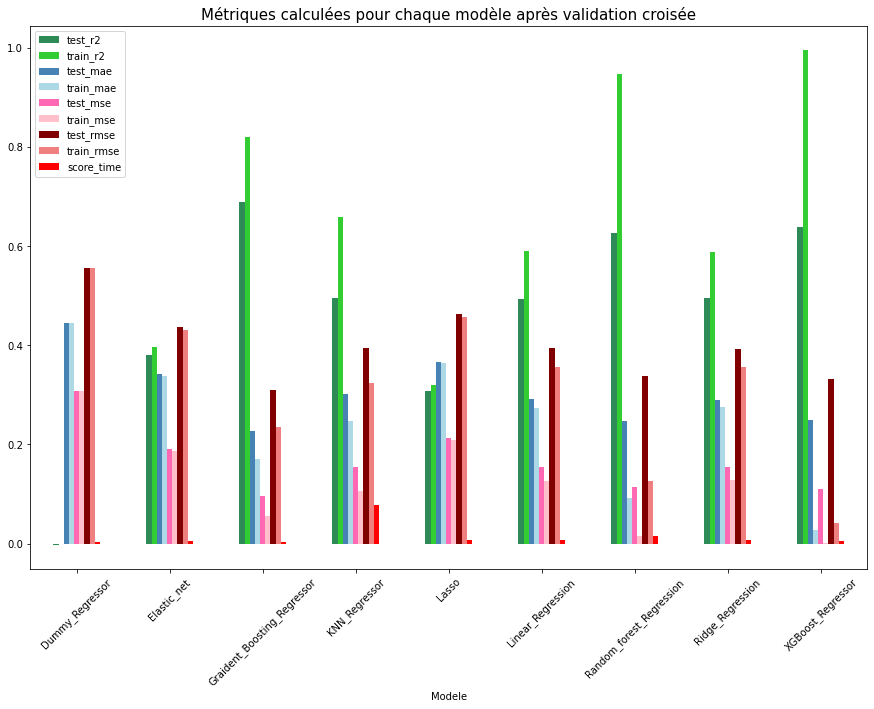

In [146]:
df_scores.plot(x="Modele", 
               y=["test_r2", "train_r2", "test_mae", "train_mae", 'test_mse', "train_mse",
                              "test_rmse", "train_rmse", 'score_time'], 
               color = ['seagreen', 'limegreen', 'steelblue', 'lightblue', 'hotpink', 'pink', 'maroon', 'lightcoral', 'red'],
               kind="bar", figsize=(15,10))
plt.title('Métriques calculées pour chaque modèle après validation croisée', size = 15)
plt.xticks(rotation = 45)
plt.savefig('modeles_scores_P4.png')

On observe que les 3 modèles dont le score R2 est le plus important concernent essentiellement le **XGBoost Regressor**, puis la **Random Forest Regressor** et le **Gradient Boosting Regressor**. 

Pour l'optimisation des hyperparamètres, on va utiliser deux techniques de sklearn (recherche par grille et recherche aléatoire)

## 4.11) Optimisation hyperparamètres avec GridSearchCV 

In [147]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [148]:
# Création d'un dictionnaire vide
results_Grid = {}

### 4.11.1) XGBoost Regressor

In [149]:
start = time.perf_counter()

# Définition des hyperparamètres à tester
param_grid = {'n_estimators': [100, 500, 1000],
              'learning_rate': [0.001, 0.01, 0.5],
              'max_depth': [3, 5, 7]}

In [150]:
# Définition de la validation croisée GridSearchCV
grid_search_xgb = GridSearchCV(xgb_r, param_grid, cv=5, return_train_score = True)

In [151]:
# Entraînement du modèle
grid_search_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'learning_rate': [0.001, 0.01, 0.5],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 500, 1000]},
             return_train_score=True)

In [152]:
#Affichons les meilleurs paramètres 
print("XGBoost: n_estimators =", grid_search_xgb.best_params_['n_estimators'],
      ", learning_rate =", grid_search_xgb.best_params_['learning_rate'],
      ", max_depth =", grid_search_xgb.best_params_['max_depth'])

XGBoost: n_estimators = 1000 , learning_rate = 0.01 , max_depth = 5


In [153]:
#Utilisation des meilleurs hyperparamètres
best_xgboost = xgb.XGBRegressor(**grid_search_xgb.best_params_)
best_xgboost.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [154]:
#On crée une fonction calculant les scores des données de test et d'entrainement
def scores_gridsearch(best_param, X_test, y_test, X_train, y_train):
    
    # Prédiction sur les données de test et d'entrainement
    model_pred_test = best_param.predict(X_test)
    model_pred_train = best_param.predict(X_train)
    
    #Calcul erreur quadratique moyenne (RMSE) 
    model_mse_test = mean_squared_error(y_test, model_pred_test)
    model_rmse_test = np.sqrt(model_mse_test)

    model_mse_train = mean_squared_error(y_train, model_pred_train)
    model_rmse_train = np.sqrt(model_mse_test)
    
    # Calcul de l'erreur absolue moyenne (MAE)
    model_mae_test = mean_absolute_error(y_test, model_pred_test)
    model_mae_train = mean_absolute_error(y_train, model_pred_train)
    
    # Calcul du coefficient de détermination (R2)
    model_r2_test = r2_score(y_test, model_pred_test)
    model_r2_train = r2_score(y_train, model_pred_train)
    
    end = time.perf_counter()

    # Affichage de l'erreur quadratique moyenne (RMSE)
    print("XGBoost RMSE test:", model_rmse_test, "XGBoost RMSE train:", model_rmse_train)
    # Affichage de l'erreur absolue moyenne (MAE)
    print("XGBoost MAE test:", model_mae_test, "XGBoost MAE train:", model_mae_train)
    #Affichage du coefficient de détermination (R2)
    print("XGBoostR2 test:", model_r2_test, "XGBoostR2 train:", model_r2_train)
    print('Time:', end-start, 'secondes')
    
    return model_r2_test, model_r2_train, model_mae_test, model_mae_train, model_mse_test, model_mse_train, model_rmse_test, model_rmse_train

In [155]:
#Calcul scores données de test et d'entrainement
results_Grid['XGBoost_Regressor'] = scores_gridsearch(best_xgboost, X_test, y_test, X_train, y_train)

XGBoost RMSE test: 0.31752409133045634 XGBoost RMSE train: 0.31752409133045634
XGBoost MAE test: 0.22815965105483124 XGBoost MAE train: 0.14944308130097098
XGBoostR2 test: 0.6715616525324192 XGBoostR2 train: 0.8573013397381648
Time: 80.09372090000002 secondes


In [156]:
from sklearn.model_selection import learning_curve
#Learning curve
# Obtention de la courbe d'apprentissage
N, train_scores, test_scores = learning_curve(grid_search_xgb.best_estimator_, X_train, y_train, train_sizes = np.linspace(0.2, 1.0, 10), cv = 5)

In [157]:
# Calcul de la moyenne et de l'écart type des scores d'entraînement et de test
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

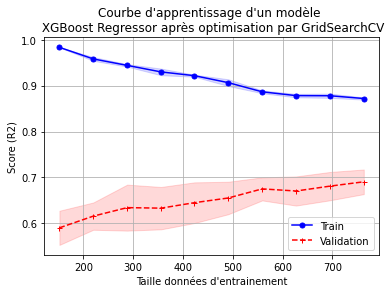

In [158]:
# Création de la courbe d'apprentissage
plt.plot(N, train_mean, color='blue', marker='o', markersize=5, label='Train')
plt.fill_between(N, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(N, test_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
plt.fill_between(N, test_mean + test_std, test_mean - test_std, alpha=0.15, color='red')
plt.title('Courbe d\'apprentissage d\'un modèle \n XGBoost Regressor après optimisation par GridSearchCV')
plt.xlabel('Taille données d\'entrainement')
plt.ylabel('Score (R2)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

### 4.11.2) Gradient Boosting Regressor

In [159]:
start = time.perf_counter()

# Définition des hyperparamètres à tester
param_grid = {'n_estimators': [100, 500, 1000],
              'learning_rate': [0.01, 0.1, 0.5],
              'max_depth': [3, 5, 7]}

In [160]:
# Définition de la validation croisée GridSearchCV
grid_search_gbr = GridSearchCV(gradientboost_reg, param_grid, cv=5, return_train_score = True)

In [161]:
# Entraînement du modèle
grid_search_gbr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=0),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 500, 1000]},
             return_train_score=True)

In [162]:
#Affichons les meilleurs paramètres 
print("Gradient Boosting Regressor: n_estimators =", grid_search_gbr.best_params_['n_estimators'],
      ", learning_rate =", grid_search_gbr.best_params_['learning_rate'],
      ", max_depth =", grid_search_gbr.best_params_['max_depth'])

Gradient Boosting Regressor: n_estimators = 100 , learning_rate = 0.1 , max_depth = 3


In [163]:
#Utilisation des meilleurs hyperparamètres
best_gbr = GradientBoostingRegressor(**grid_search_gbr.best_params_)
best_gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [164]:
#Calcul scores données de test et d'entrainement
results_Grid['Gradient_Boosting_Regressor'] = scores_gridsearch(best_gbr, X_test, y_test, X_train, y_train)

XGBoost RMSE test: 0.3188362758946628 XGBoost RMSE train: 0.3188362758946628
XGBoost MAE test: 0.23042806968299862 XGBoost MAE train: 0.1771402795420817
XGBoostR2 test: 0.6688414668961089 XGBoostR2 train: 0.8077501333261033
Time: 338.97458209999996 secondes


In [165]:
#Learning curve
# Obtention de la courbe d'apprentissage
N, train_scores, test_scores = learning_curve(grid_search_gbr.best_estimator_, X_train, y_train, train_sizes = np.linspace(0.2, 1.0, 10), cv = 5)

In [166]:
# Calcul de la moyenne et de l'écart type des scores d'entraînement et de test
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

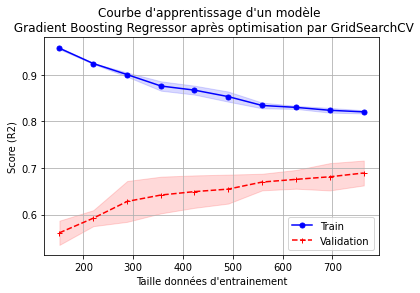

In [167]:
# Création de la courbe d'apprentissage
plt.plot(N, train_mean, color='blue', marker='o', markersize=5, label='Train')
plt.fill_between(N, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(N, test_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
plt.fill_between(N, test_mean + test_std, test_mean - test_std, alpha=0.15, color='red')
plt.title('Courbe d\'apprentissage d\'un modèle \n Gradient Boosting Regressor après optimisation par GridSearchCV')
plt.xlabel('Taille données d\'entrainement')
plt.ylabel('Score (R2)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

### 4.11.3) Random Forest Regression

In [168]:
start = time.perf_counter()

# Définition des hyperparamètres à tester
param_grid = {'n_estimators': [100, 500, 1000],
              'max_depth': [3, 5, 7]}

In [169]:
# Définition de la validation croisée GridSearchCV
grid_search_rf = GridSearchCV(rfr_reg, param_grid, cv=5, return_train_score = True)

In [170]:
# Entraînement du modèle
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [3, 5, 7],
                         'n_estimators': [100, 500, 1000]},
             return_train_score=True)

In [171]:
# Affichage des hyperparamètres optimaux
print("Random Forest Regressor: n_estimators =", grid_search_rf.best_params_['n_estimators'],
      ", max_depth =", grid_search_rf.best_params_['max_depth'])

Random Forest Regressor: n_estimators = 1000 , max_depth = 7


In [172]:
# Prédiction sur les données de test
best_rfr = RandomForestRegressor(**grid_search_rf.best_params_)
best_rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, n_estimators=1000)

In [173]:
#Calcul des scores des données de test et d'entrainement
results_Grid['Random_Forest_Regressor'] = scores_gridsearch(best_rfr, X_test, y_test, X_train, y_train)

XGBoost RMSE test: 0.3356834524027429 XGBoost RMSE train: 0.3356834524027429
XGBoost MAE test: 0.2439470826355672 XGBoost MAE train: 0.19034088709578117
XGBoostR2 test: 0.6329203061394708 XGBoostR2 train: 0.78518465998236
Time: 147.4101458 secondes


In [174]:
#Learning curve
# Obtention de la courbe d'apprentissage
N, train_scores, test_scores = learning_curve(grid_search_rf.best_estimator_, X_train, y_train, train_sizes = np.linspace(0.2, 1.0, 10), cv = 5)

In [175]:
# Calcul de la moyenne et de l'écart type des scores d'entraînement et de test
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

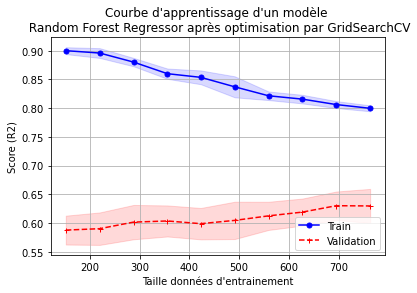

In [176]:
# Création de la courbe d'apprentissage
plt.plot(N, train_mean, color='blue', marker='o', markersize=5, label='Train')
plt.fill_between(N, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(N, test_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
plt.fill_between(N, test_mean + test_std, test_mean - test_std, alpha=0.15, color='red')
plt.title('Courbe d\'apprentissage d\'un modèle \n Random Forest Regressor après optimisation par GridSearchCV')
plt.xlabel('Taille données d\'entrainement')
plt.ylabel('Score (R2)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

## 4.12) Prédictions  

In [177]:
liste_modeles = ['Random_Forest_Regressor', 'XGBoost_Regressor', 'Gradient_Boosting_Regressor']
liste = []
for modele in liste_modeles:
#     dict = ast.literal_eval(modele) 
    df = pd.DataFrame(results_Grid[modele]).transpose()
    df['Modele'] = modele
    liste.append(df)
df_results = pd.concat(liste, ignore_index = True)
df_results.columns = ['test_r2', 'train_r2', 'test_mae', 'train_mae', 'test_mse', 'train_mse', 'test_rmse', 'train_rmse', 'Modele']

In [178]:
df_results

,test_r2,train_r2,test_mae,train_mae,test_mse,train_mse,test_rmse,train_rmse,Modele
0,0.632920,0.785185,0.243947,0.190341,0.112683,0.066259,0.335683,0.335683,Random_Forest_Regressor
1,0.671562,0.857301,0.228160,0.149443,0.100822,0.044015,0.317524,0.317524,XGBoost_Regressor
2,0.668841,0.807750,0.230428,0.177140,0.101657,0.059299,0.318836,0.318836,Gradient_Boosting_Regressor


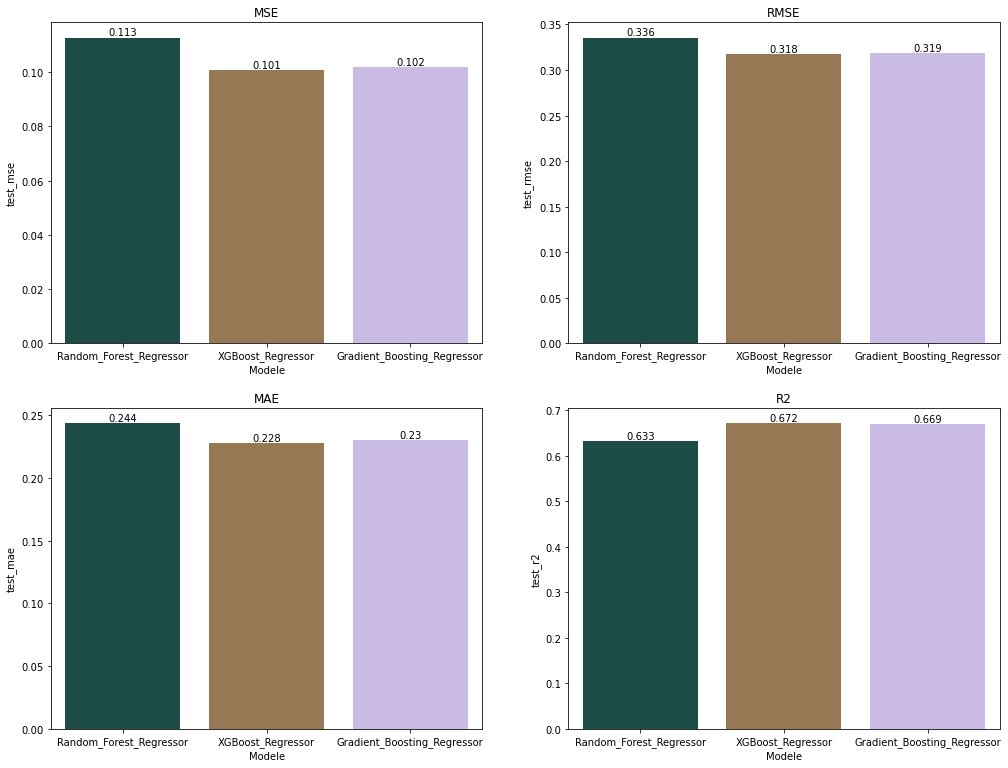

In [179]:
#Représentation graphique

fig,axs=plt.subplots(2,2,figsize=(17,13))

# MSE
subset = df_results[['Modele', 'test_mse']]
sns.barplot(data=subset, x='Modele', y='test_mse', ax=axs[0, 0], palette = 'cubehelix')
for i, value in enumerate(subset.iloc[:, 1]):
    axs[0, 0].annotate(round(value, 3), xy=(i, value), ha='center', va='bottom')
axs[0, 0].set_title('MSE')
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels())

#RMSE
subset = df_results[['Modele', 'test_rmse']]
sns.barplot(data=subset, x='Modele', y='test_rmse', ax=axs[0, 1], palette = 'cubehelix')
for i, value in enumerate(subset.iloc[:, 1]):
    axs[0, 1].annotate(round(value, 3), xy=(i, value), ha='center', va='bottom')
axs[0, 1].set_title('RMSE')
axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels())

#MAE
subset = df_results[['Modele', 'test_mae']]
sns.barplot(data=subset, x='Modele', y='test_mae', ax=axs[1, 0], palette = 'cubehelix')
for i, value in enumerate(subset.iloc[:, 1]):
    axs[1, 0].annotate(round(value, 3), xy=(i, value), ha='center', va='bottom')
axs[1, 0].set_title('MAE')
axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels())

#R2
subset = df_results[['Modele', 'test_r2']]
sns.barplot(data=subset, x='Modele', y='test_r2', ax=axs[1, 1], palette = 'cubehelix')
for i, value in enumerate(subset.iloc[:, 1]):
    axs[1, 1].annotate(round(value, 3), xy=(i, value), ha='center', va='bottom')
axs[1, 1].set_title('R2')
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels())

plt.show()

Nous observons que pour les valeurs de MSE, RMSE et MAE, c'est pour le modèle **XGBoost Regressor** qu'elles sont les plus faibles. Et la valeur du coefficient de détermination est la plus forte également avec le Gradient Boosting Regressor. Néanmoins, le modèle XGBoost Regressor n'est pas très loin derrière. 

In [180]:
#On crée une fonction calculant les scores des données de test
def calcul_scores_test(best_param, X_test, y_test):
    # Prédiction sur les données de test et d'entrainement
    model_pred_test = best_param.predict(X_test)
        
    #Calcul erreur quadratique moyenne (RMSE) 
    model_mse_test = mean_squared_error(y_test, model_pred_test)
    model_rmse_test = np.sqrt(model_mse_test)
    
    # Calcul de l'erreur absolue moyenne (MAE)
    model_mae_test = mean_absolute_error(y_test, model_pred_test)
    
    # Calcul du coefficient de détermination (R2)
    model_r2_test = r2_score(y_test, model_pred_test)
    
    return model_pred_test, model_mse_test, model_rmse_test, model_mae_test, model_r2_test

In [181]:
# Appel des fonctions pour calculer les scores des données de test des différents modèles
xgboost_pred_test, xgboost_mse_test, xgboost_rmse_test, xgboost_mae_test, xgboost_r2_test = calcul_scores_test(best_xgboost, X_test, y_test)
gbr_pred_test, gbr_mse_test, gbr_rmse_test, gbr_mae_test, gbr_r2_test = calcul_scores_test(best_gbr, X_test, y_test)
rfr_pred_test, rfr_mse_test, rfr_rmse_test, rfr_mae_test, rfr_r2_test = calcul_scores_test(best_rfr, X_test, y_test)

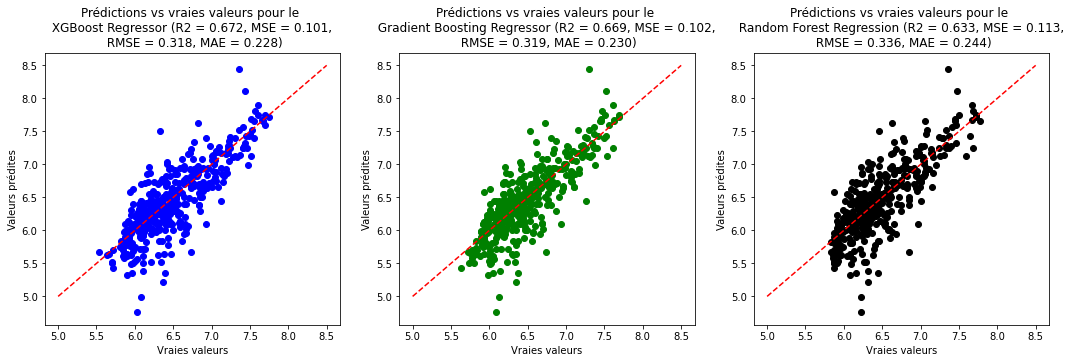

In [182]:
#On va faire des nuages de points pour chaque modèle sélectionné pour l'optimisation

# Création de la figure avec trois sous-graphiques en ligne
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18,5))

#Pour XGBoost Regressor
axs[0].scatter(xgboost_pred_test, y_test, color = 'b')
axs[0].plot([5, 8.5], [5, 8.5], '--', color='red')
# Ajoutez une légende pour les scores
axs[0].set_xlabel('Vraies valeurs')
axs[0].set_ylabel('Valeurs prédites')
axs[0].set_title('Prédictions vs vraies valeurs pour le \n XGBoost Regressor (R2 = {:.3f}, MSE = {:.3f}, \n RMSE = {:.3f}, MAE = {:.3f})'.format(xgboost_r2_test, xgboost_mse_test, xgboost_rmse_test, xgboost_mae_test))

#Pour Gradient Boosting Regressor
axs[1].scatter(gbr_pred_test, y_test, color = 'g')
axs[1].plot([5, 8.5], [5, 8.5], '--', color='red')
# Ajoutez une légende pour les scores
axs[1].set_xlabel('Vraies valeurs')
axs[1].set_ylabel('Valeurs prédites')
axs[1].set_title('Prédictions vs vraies valeurs pour le \n Gradient Boosting Regressor (R2 = {:.3f}, MSE = {:.3f}, \n RMSE = {:.3f}, MAE = {:.3f})'.format(gbr_r2_test, gbr_mse_test, gbr_rmse_test, gbr_mae_test))

#Pour Random Forest Regression
axs[2].scatter(rfr_pred_test, y_test, color = 'k')
axs[2].plot([5, 8.5], [5, 8.5], '--', color='red')
# Ajoutez une légende pour les scores
axs[2].set_xlabel('Vraies valeurs')
axs[2].set_ylabel('Valeurs prédites')
axs[2].set_title('Prédictions vs vraies valeurs pour le \n Random Forest Regression (R2 = {:.3f}, MSE = {:.3f}, \n RMSE = {:.3f}, MAE = {:.3f})'.format(rfr_r2_test, rfr_mse_test, rfr_rmse_test, rfr_mae_test))


plt.show()

La ligne rouge indique les valeurs auxquelles devraient être égales les valeurs observées et de prédiction.  

D'après les nuages de points des valeurs observées et des valeurs prédites, on peut voir que le modèle va avoir tendance à  sous-estimer les faibles valeurs et sur-estimer les fortes valeurs. 

### 4.12.1) SHAP pour le modèle Gradient Boosting Regressor

In [183]:
!pip install shap

In [184]:
import shap

In [185]:
# instanciation de l'objet TreeExplainer
explainer = shap.TreeExplainer(grid_search_gbr.best_estimator_)

In [186]:
# calcul des valeurs Shap pour toutes les observations
shap_values = explainer.shap_values(X_train)

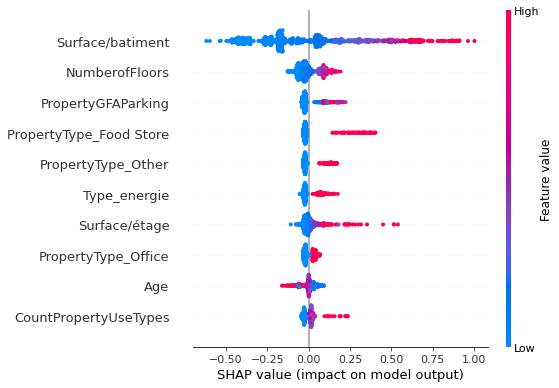

In [187]:
# visualisation des résultats
shap.summary_plot(shap_values, X_train, max_display = 10)

D'après la visualisation de l'importance des features on observe qu'une surface/bâtiment élevée augmente la consommation du bâtiment, idem pour la surface/étage. 

L'énergie star Score a aussi un impact sur la consommation. 

## 4.13) Optimisation hyperparamètres avec RandomizedSearchCV
### 4.13.1) XGBoost Regressor

In [188]:
# Création d'un dictionnaire vide
results_Grid = {}

In [189]:
## Essayons avec RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

In [190]:
params = {
    "learning_rate": uniform(0.01, 0.3),  # taux d'apprentissage
    "max_depth": randint(3, 12),  # profondeur maximale de l'arbre
    "n_estimators": randint(100, 1000)}

In [191]:
R_searchCV_xgb = RandomizedSearchCV(
    xgb_r, params, random_state=42, n_iter=100, cv=5, verbose=1, n_jobs=-1
)

R_searchCV_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          predictor=None, random_state=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000189B06D79A0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000189B07F7610>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000189B06C3100>},
                   random_state=42, verbose=1)

In [192]:
# Affichage des hyperparamètres optimaux
print("XGBoost Regressor: n_estimators =", R_searchCV_xgb.best_params_['n_estimators'],
      ", max_depth =", R_searchCV_xgb.best_params_['max_depth'], 
     ", learning_rate =", R_searchCV_xgb.best_params_['learning_rate'])

XGBoost Regressor: n_estimators = 147 , max_depth = 3 , learning_rate = 0.14483520224146101


In [193]:
# Prédiction sur les données de test
best_xgboost_R = xgb.XGBRegressor(**R_searchCV_xgb.best_params_)
best_xgboost_R.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.14483520224146101,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=147, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [194]:
#Calcul des scores pour les données d'entrainement et de test
results_Grid['XGBoost_Regressor'] = scores_gridsearch(best_xgboost_R, X_test, y_test, X_train, y_train)

XGBoost RMSE test: 0.3097106560051818 XGBoost RMSE train: 0.3097106560051818
XGBoost MAE test: 0.22550744100337067 XGBoost MAE train: 0.1596360297585518
XGBoostR2 test: 0.6875267886448613 XGBoostR2 train: 0.8389278490137528
Time: 477.8232485000001 secondes


In [195]:
#Learning curve
# Obtention de la courbe d'apprentissage
N, train_scores, test_scores = learning_curve(R_searchCV_xgb.best_estimator_, X_train, y_train, train_sizes = np.linspace(0.2, 1.0, 10), cv = 5)

In [196]:
# Calcul de la moyenne et de l'écart type des scores d'entraînement et de test
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

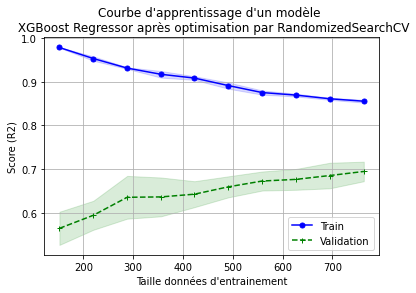

In [197]:
# Création de la courbe d'apprentissage
plt.plot(N, train_mean, color='blue', marker='o', markersize=5, label='Train')
plt.fill_between(N, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(N, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation')
plt.fill_between(N, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Courbe d\'apprentissage d\'un modèle \n XGBoost Regressor après optimisation par RandomizedSearchCV')
plt.xlabel('Taille données d\'entrainement')
plt.ylabel('Score (R2)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

### 4.13.2) Gradient Boosting Regressor

In [198]:
params = {
    "learning_rate": uniform(0.01, 0.3),  # taux d'apprentissage
    "max_depth": randint(2, 12),  # profondeur maximale de l'arbre
    "n_estimators": randint(50, 1000)}

In [199]:
R_searchCV_gbr = RandomizedSearchCV(
    gradientboost_reg, params, random_state=42, n_iter=100, cv=5, verbose=1, n_jobs=-1
)

R_searchCV_gbr.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000189B0878C70>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000189B088C250>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000189B0878880>},
                   random_state=42, verbose=1)

In [200]:
# Affichage des hyperparamètres optimaux
print("XGBoost Regressor: n_estimators =", R_searchCV_gbr.best_params_['n_estimators'],
      ", max_depth =", R_searchCV_gbr.best_params_['max_depth'], 
     ", learning_rate =", R_searchCV_gbr.best_params_['learning_rate'])

XGBoost Regressor: n_estimators = 434 , max_depth = 2 , learning_rate = 0.09359393927098342


In [201]:
# Prédiction sur les données de test
best_gbr_R = GradientBoostingRegressor(**R_searchCV_gbr.best_params_)
best_gbr_R.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.09359393927098342, max_depth=2,
                          n_estimators=434)

In [202]:
#Calcul des scores des données d'entrainement et de test
results_Grid['Gradient_Boosting_Regressor'] = scores_gridsearch(best_gbr_R, X_test, y_test, X_train, y_train)

XGBoost RMSE test: 0.31188626593551255 XGBoost RMSE train: 0.31188626593551255
XGBoost MAE test: 0.23004649890197418 XGBoost MAE train: 0.16442594412568667
XGBoostR2 test: 0.6831213375725204 XGBoostR2 train: 0.8324676362633823
Time: 603.5417386 secondes


In [203]:
#Learning curve
# Obtention de la courbe d'apprentissage
N, train_scores, test_scores = learning_curve(R_searchCV_gbr.best_estimator_, X_train, y_train, train_sizes = np.linspace(0.2, 1.0, 10), cv = 5)

In [204]:
# Calcul de la moyenne et de l'écart type des scores d'entraînement et de test
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

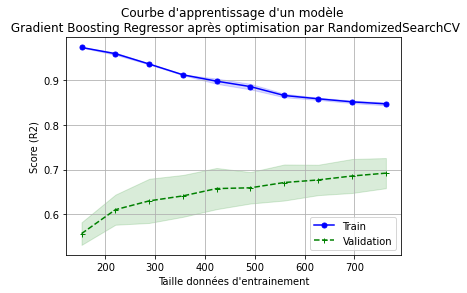

In [205]:
# Création de la courbe d'apprentissage
plt.plot(N, train_mean, color='blue', marker='o', markersize=5, label='Train')
plt.fill_between(N, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(N, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation')
plt.fill_between(N, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Courbe d\'apprentissage d\'un modèle \n Gradient Boosting Regressor après optimisation par RandomizedSearchCV')
plt.xlabel('Taille données d\'entrainement')
plt.ylabel('Score (R2)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

### 4.13.3) Random Forest Regression

In [206]:
params = {
    "max_depth": randint(2, 12),  # profondeur maximale de l'arbre
    "n_estimators": randint(100, 1000)}

In [207]:
R_searchCV_RF = RandomizedSearchCV(
    rfr_reg, params, random_state=42, n_iter=100, cv=5, verbose=1, n_jobs=-1
)

R_searchCV_RF.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000189B08D8D90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000189B08BD520>},
                   random_state=42, verbose=1)

In [208]:
# Affichage des hyperparamètres optimaux
print("Random Forest Regressor: n_estimators =", R_searchCV_RF.best_params_['n_estimators'],
      ", max_depth =", R_searchCV_RF.best_params_['max_depth'])

Random Forest Regressor: n_estimators = 801 , max_depth = 10


In [209]:
# Prédiction sur les données de test
best_rfr_R = RandomForestRegressor(**R_searchCV_RF.best_params_)
best_rfr_R.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=801)

In [210]:
results_Grid['Random_Forest_Regressor'] = scores_gridsearch(best_rfr_R, X_test, y_test, X_train, y_train)

XGBoost RMSE test: 0.3328230769617594 XGBoost RMSE train: 0.3328230769617594
XGBoost MAE test: 0.2413454187950135 XGBoost MAE train: 0.1464859940504192
XGBoostR2 test: 0.6391494618710574 XGBoostR2 train: 0.8747796266970946
Time: 833.4970425 secondes


In [211]:
#Learning curve
# Obtention de la courbe d'apprentissage
N, train_scores, test_scores = learning_curve(R_searchCV_RF.best_estimator_, X_train, y_train, train_sizes = np.linspace(0.2, 1.0, 10), cv = 5)

In [212]:
# Calcul de la moyenne et de l'écart type des scores d'entraînement et de test
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

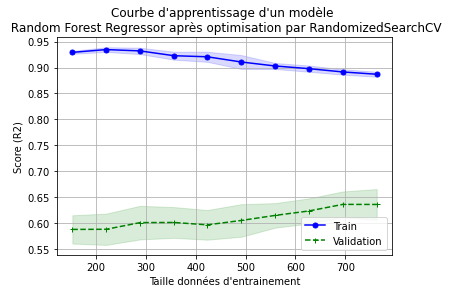

In [213]:
# Création de la courbe d'apprentissage
plt.plot(N, train_mean, color='blue', marker='o', markersize=5, label='Train')
plt.fill_between(N, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(N, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation')
plt.fill_between(N, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Courbe d\'apprentissage d\'un modèle \n Random Forest Regressor après optimisation par RandomizedSearchCV')
plt.xlabel('Taille données d\'entrainement')
plt.ylabel('Score (R2)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

## 4.14) Prédictions

In [214]:
liste_modeles = ['Random_Forest_Regressor', 'XGBoost_Regressor', 'Gradient_Boosting_Regressor']
liste = []
for modele in liste_modeles:
#     dict = ast.literal_eval(modele) 
    df = pd.DataFrame(results_Grid[modele]).transpose()
    df['Modele'] = modele
    liste.append(df)
df_results_rand = pd.concat(liste, ignore_index = True)
df_results_rand.columns = ['test_r2', 'train_r2', 'test_mae', 'train_mae', 'test_mse', 'train_mse', 'test_rmse', 'train_rmse', 'Modele']

In [215]:
#On va ajouter à nos df la méthode d'optimisation des paramètres correspondante

df_results['Method'] = 'GridSearchCV'
df_results_rand['Method'] = 'RandomizedSearchCV'

In [216]:
#On va concaténer nos deux df de résultats 
results_searchCV = pd.concat([df_results, df_results_rand])
results_searchCV

,test_r2,train_r2,test_mae,train_mae,test_mse,train_mse,test_rmse,train_rmse,Modele,Method
0,0.632920,0.785185,0.243947,0.190341,0.112683,0.066259,0.335683,0.335683,Random_Forest_Regressor,GridSearchCV
1,0.671562,0.857301,0.228160,0.149443,0.100822,0.044015,0.317524,0.317524,XGBoost_Regressor,GridSearchCV
2,0.668841,0.807750,0.230428,0.177140,0.101657,0.059299,0.318836,0.318836,Gradient_Boosting_Regressor,GridSearchCV
0,0.639149,0.874780,0.241345,0.146486,0.110771,0.038624,0.332823,0.332823,Random_Forest_Regressor,RandomizedSearchCV
1,0.687527,0.838928,0.225507,0.159636,0.095921,0.049682,0.309711,0.309711,XGBoost_Regressor,RandomizedSearchCV
2,0.683121,0.832468,0.230046,0.164426,0.097273,0.051675,0.311886,0.311886,Gradient_Boosting_Regressor,RandomizedSearchCV


In [217]:
y_min_mse = min(results_searchCV['test_mse'])
y_min_mse

0.09592069044316005

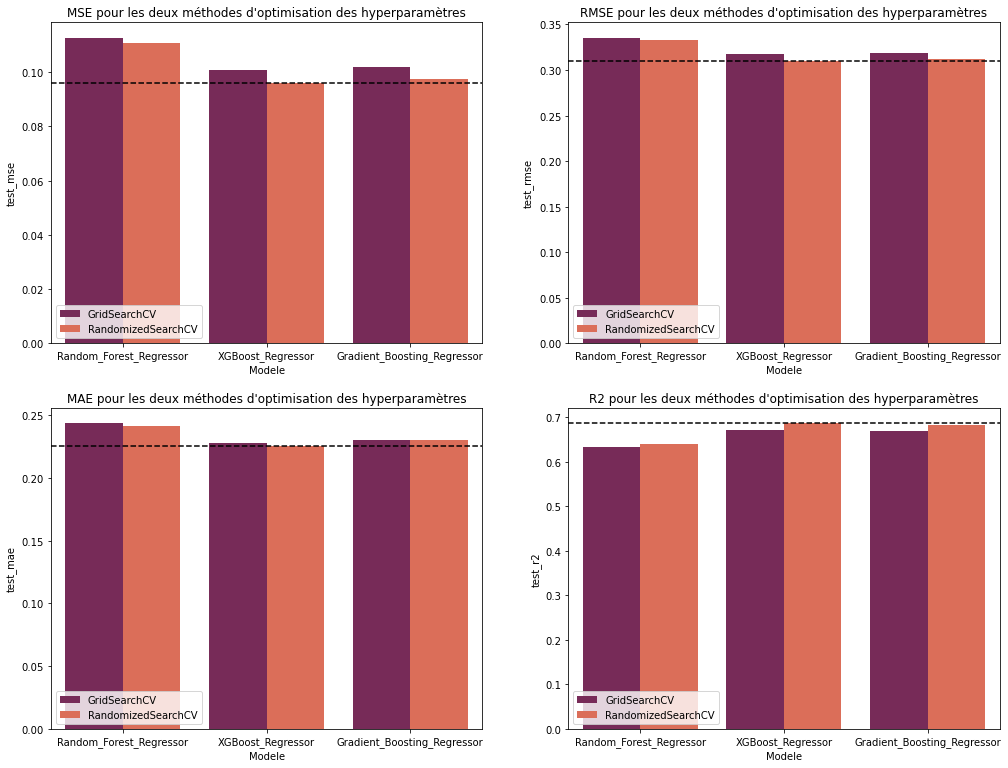

In [218]:
#Représentation graphique

fig,axs=plt.subplots(2,2,figsize=(17,13))
#colors = ['blue','purple','brown','teal']

# MSE
y_min_mse = min(results_searchCV['test_mse'])
subset = results_searchCV[['Modele', 'test_mse', 'Method']]
sns.barplot(data=subset, x='Modele', y='test_mse', ax=axs[0, 0], hue = 'Method', palette = 'rocket')
# for i, value in enumerate(subset.iloc[:, 1]):
#     axs[0, 0].annotate(round(value, 3), xy=(i, value), ha='center', va='bottom')
axs[0, 0].set_title('MSE pour les deux méthodes d\'optimisation des hyperparamètres')
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels())
axs[0, 0].legend(loc = 'lower left')
axs[0, 0].axhline(y=y_min_mse, linestyle='--', color='k')

#RMSE
y_min_rmse = min(results_searchCV['test_rmse'])
subset = results_searchCV[['Modele', 'test_rmse', 'Method']]
sns.barplot(data=subset, x='Modele', y='test_rmse', ax=axs[0, 1], hue = 'Method', palette = 'rocket')
# for i, value in enumerate(subset.iloc[:, 1]):
#     axs[0, 1].annotate(round(value, 3), xy=(i, value), ha='center', va='bottom')
axs[0, 1].set_title('RMSE pour les deux méthodes d\'optimisation des hyperparamètres')
axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels())
axs[0, 1].legend(loc = 'lower left')
axs[0, 1].axhline(y=y_min_rmse, linestyle='--', color='k')

#MAE
y_min_mae = min(results_searchCV['test_mae'])
subset = results_searchCV[['Modele', 'test_mae', 'Method']]
sns.barplot(data=subset, x='Modele', y='test_mae', ax=axs[1, 0], hue = 'Method', palette = 'rocket')
# for i, value in enumerate(subset.iloc[:, 1]):
#     axs[1, 0].annotate(round(value, 3), xy=(i, value), ha='center', va='bottom')
axs[1, 0].set_title('MAE pour les deux méthodes d\'optimisation des hyperparamètres')
axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels())
axs[1, 0].legend(loc = 'lower left')
axs[1, 0].axhline(y=y_min_mae, linestyle='--', color='k')

#R2
y_max_r2 = max(results_searchCV['test_r2'])
subset = results_searchCV[['Modele', 'test_r2', 'Method']]
sns.barplot(data=subset, x='Modele', y='test_r2', ax=axs[1, 1], hue = 'Method', palette = 'rocket')
# for i, value in enumerate(subset.iloc[:, 1]):
#     axs[1, 1].annotate(round(value, 3), xy=(i, value), ha='center', va='bottom')
axs[1, 1].set_title('R2 pour les deux méthodes d\'optimisation des hyperparamètres')
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels())
axs[1, 1].legend(loc = 'lower left')
axs[1, 1].axhline(y=y_max_r2, linestyle='--', color='k')

plt.show()

De légères différences sont observées entre les deux méthodes d'optimisation GridSearchCV et RandomizedSearchCV, avec de **meilleures performances** pour la méthode de recherche par grille pour nos 3 modèles.

Des similitudes sont observées pour le modèle **XGBoost Regressor** et **Gradient Boosting Regressor**. 

In [219]:
# On crée une fonction affichant le modèle avec les meilleures valeurs de score.

def best_model(nom_df, col_r2, col_mae, col_mse, col_rmse, col_model):
    max_r2 = nom_df[col_r2].idxmax()
    min_mae = nom_df[col_mae].idxmin()
    min_mse = nom_df[col_mse].idxmin()
    min_rmse = nom_df[col_mse].idxmin()
        
    liste_max = [max_r2, min_mae, min_mse, min_rmse]
    for i in liste_max:
        modele_max = nom_df.loc[i, col_model]
        print('------------------')
        print('Le modèle correspondant aux résultats les plus performants est:', modele_max)

In [220]:
#Affichons le modèle avec les résultats les plus performants.  
best_model(results_searchCV, 'test_r2', 'test_mae', 'test_mse', 'test_rmse', 'Modele')

------------------
Le modèle correspondant aux résultats les plus performants est: 1    XGBoost_Regressor
1    XGBoost_Regressor
Name: Modele, dtype: object
------------------
Le modèle correspondant aux résultats les plus performants est: 1    XGBoost_Regressor
1    XGBoost_Regressor
Name: Modele, dtype: object
------------------
Le modèle correspondant aux résultats les plus performants est: 1    XGBoost_Regressor
1    XGBoost_Regressor
Name: Modele, dtype: object
------------------
Le modèle correspondant aux résultats les plus performants est: 1    XGBoost_Regressor
1    XGBoost_Regressor
Name: Modele, dtype: object


In [221]:
# Appel des fonctions pour calculer les scores des données de test des différents modèles
xgboost_pred_rand, xgboost_mse_rand, xgboost_rmse_rand, xgboost_mae_rand, xgboost_r2_rand = calcul_scores_test(best_xgboost_R, X_test, y_test)
gbr_pred_rand, gbr_mse_rand, gbr_rmse_rand, gbr_mae_rand, gbr_r2_rand = calcul_scores_test(best_gbr_R, X_test, y_test)
rfr_pred_rand, rfr_mse_rand, rfr_rmse_rand, rfr_mae_rand, rfr_r2_rand = calcul_scores_test(best_rfr_R, X_test, y_test)

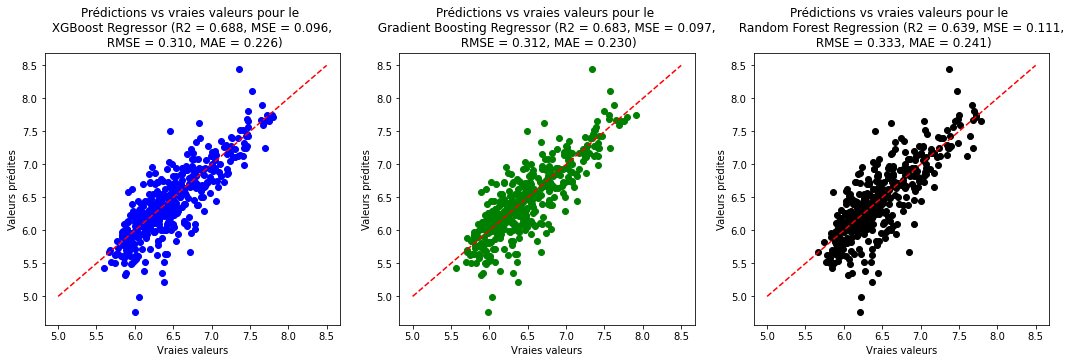

In [222]:
#On va faire des nuages de points pour chaque modèle sélectionné pour l'optimisation

# Création de la figure avec trois sous-graphiques en ligne
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18,5))


#Pour XGBoost Regressor
axs[0].scatter(xgboost_pred_rand, y_test, color = 'b')
axs[0].plot([5, 8.5], [5, 8.5], '--', color='red')
# Ajoutez une légende pour les scores
axs[0].set_xlabel('Vraies valeurs')
axs[0].set_ylabel('Valeurs prédites')
axs[0].set_title('Prédictions vs vraies valeurs pour le \n XGBoost Regressor (R2 = {:.3f}, MSE = {:.3f}, \n RMSE = {:.3f}, MAE = {:.3f})'.format(xgboost_r2_rand, xgboost_mse_rand, xgboost_rmse_rand, xgboost_mae_rand))

#Pour Gradient Boosting Regressor
axs[1].scatter(gbr_pred_rand, y_test, color = 'g')
axs[1].plot([5, 8.5], [5, 8.5], '--', color='red')
# Ajoutez une légende pour les scores
axs[1].set_xlabel('Vraies valeurs')
axs[1].set_ylabel('Valeurs prédites')
axs[1].set_title('Prédictions vs vraies valeurs pour le \n Gradient Boosting Regressor (R2 = {:.3f}, MSE = {:.3f}, \n RMSE = {:.3f}, MAE = {:.3f})'.format(gbr_r2_rand, gbr_mse_rand, gbr_rmse_rand, gbr_mae_rand))

#Pour Random Forest Regression
axs[2].scatter(rfr_pred_rand, y_test, color = 'k')
axs[2].plot([5, 8.5], [5, 8.5], '--', color='red')
# Ajoutez une légende pour les scores
axs[2].set_xlabel('Vraies valeurs')
axs[2].set_ylabel('Valeurs prédites')
axs[2].set_title('Prédictions vs vraies valeurs pour le \n Random Forest Regression (R2 = {:.3f}, MSE = {:.3f}, \n RMSE = {:.3f}, MAE = {:.3f})'.format(rfr_r2_rand, rfr_mse_rand, rfr_rmse_rand, rfr_mae_rand))


plt.show()

Le modèle avec les meilleurs scores reste le Gradient Boosting Regressor, bien que le modèle XGBoost regressor ne soit pas loin derrière. 

### 4.14.1) SHAP pour le modèle Gradient Boosting Regressor (optimisation par RandomizedSearchCV)

In [223]:
# instanciation de l'objet TreeExplainer
explainer = shap.TreeExplainer(R_searchCV_gbr.best_estimator_)

In [224]:
# calcul des valeurs Shap pour toutes les observations
shap_values = explainer.shap_values(X_train)

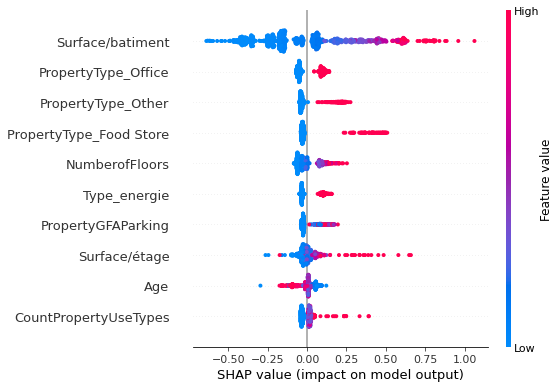

In [225]:
# visualisation des résultats
shap.summary_plot(shap_values, X_train, max_display = 10)

### 4.14.2) SHAP pour les 3 différents modèles (optimisation par RandomizedSearchCV)

In [226]:
# instanciation de l'objet TreeExplainer
explainer1 = shap.TreeExplainer(R_searchCV_xgb.best_estimator_)
explainer2 = shap.TreeExplainer(R_searchCV_gbr.best_estimator_)
explainer3 = shap.TreeExplainer(R_searchCV_RF.best_estimator_)

In [227]:
# Valeurs de SHAP pour chaque modèle
shap_val1 = explainer1.shap_values(X_train)
shap_val2 = explainer2.shap_values(X_train)
shap_val3 = explainer3.shap_values(X_train)

In [228]:
# Calcul valeurs SHAP moyennes pour chaque fonctionnalité pour chaque modèle
shap_mean1 = np.mean(np.abs(shap_val1), axis=0)
shap_mean2 = np.mean(np.abs(shap_val2), axis=0)
shap_mean3 = np.mean(np.abs(shap_val3), axis=0)

In [229]:
# Valeurs stockées dans un tableau
shap_means = pd.DataFrame({
    'XGBoost Regressor': shap_mean1,
    'Gradient Boosting Regressor': shap_mean2,
    'Random Forest Regressor': shap_mean3,
}, index=X.columns)

<AxesSubplot:title={'center':'Comparaison des valeurs SHAP pour trois modèles différents'}>

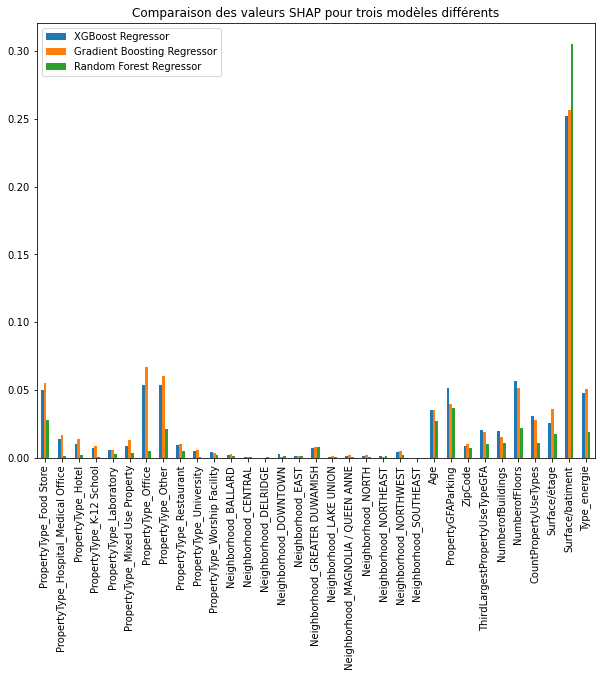

In [230]:
# Afficher un graphique en barres des valeurs SHAP moyennes pour chaque fonctionnalité pour chaque modèle
shap_means.plot(kind='bar', title='Comparaison des valeurs SHAP pour trois modèles différents', figsize = (10,8))